In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [3]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [4]:
#!kaggle datasets download -d kartik2112/fraud-detection

**Import libraries**

In [5]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 500)

**Importing data from CSV file into pandas dataframe**

In [6]:
# Reading the train data set

df_train =pd.read_csv("/content/drive/MyDrive/Kaggle/fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# Reading the test data set

df_test =pd.read_csv("/content/drive/MyDrive/Kaggle/fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


**STEP 1: Understanding Data**

**Inspecting the data frames**

In [8]:
# Dropping Unnamed column as it is an unnessary index column

df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
# Inspecting shape of the data frames

print(df_train.shape)
print(df_test.shape)

(1296675, 22)
(555719, 22)


The data set has 22 features. 
Train set has 1296675 rows and test set has 555719 rows

In [10]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
df_test.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


- Mean transaction amount is 70 dollars and mininum transaction amount is 1 dollar
- Maximum transaction amount is 28948.90 and 22768.11 dollars
- Population metrics are similar except for count in both the data sets.
- Mean of is_fraud is less than 0.1. 

- 

In [12]:
# Inspecting columns and their data types

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [13]:
# Inspecting columns and their data types

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

**Data quality and missing values check**

In [14]:
# Missing value check 

df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
# Missing value check 

df_test.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing values in the data set

In [16]:
# Unique values in each column

df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [17]:
# Unique values in each column

df_test.nunique()

trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

- Few categorical features are available in the data set. 
- Fetaure importance is checked to eliminate unimportant features
- One hot encoding is performed on the important features
- Numerical variables can be binned to seperate categories.

**Data Cleansing and feature engineering**

In [18]:
# Binning the 'city_pop' column 
# If the population is less than 25% -> rural, 25-75% -> semi-urban, and more than 75% -> urban

df_train['area'] = pd.qcut(df_train.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])
df_test['area'] = pd.qcut(df_test.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

In [19]:
# Converting the data type of trans_date_trans_time into datetime

df_train["trans_date_trans_time"] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test["trans_date_trans_time"] = pd.to_datetime(df_test['trans_date_trans_time'])

In [20]:
# Deriving 'Transaction Hour' Feature from 'trans_date_trans_time' Feature

df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour

In [21]:
# Deriving 'Day of Week' Feature from 'trans_date_trans_time' Feature

df_train['trans_day_of_week'] = df_train['trans_date_trans_time'].dt.day_name()
df_test['trans_day_of_week'] = df_test['trans_date_trans_time'].dt.day_name()

In [22]:
# Deriving 'Year_Month' Feature from 'trans_date_trans_time' Feature

df_train['trans_year_month'] = df_train['trans_date_trans_time'].dt.to_period('M')
df_test['trans_year_month'] = df_test['trans_date_trans_time'].dt.to_period('M')

In [23]:
# Deriving 'Transaction Date' Feature from 'trans_date_trans_time' Feature

df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])

df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])

In [24]:
# Converting the data type of dob into datetime

df_train["dob"] = pd.to_datetime(df_train['dob'])
df_test["dob"] = pd.to_datetime(df_test['dob'])

In [25]:
# Deriving 'Age' Feature from 'dob' Feature

df_train['cust_age'] = np.round((pd.to_datetime('now') - df_train['dob']) / np.timedelta64(1, 'Y'))
df_test['cust_age'] = np.round((pd.to_datetime('now') - df_test['dob']) / np.timedelta64(1, 'Y'))


In [26]:
# Deriving field "customer age on transaction date" from "trans_date" and "dob" features

df_train['age_at_trans'] = df_train['trans_date'] - df_train['dob']
df_train['age_at_trans'] = df_train['age_at_trans'].astype('timedelta64[Y]')

df_test['age_at_trans'] = df_test['trans_date'] - df_test['dob']
df_test['age_at_trans'] = df_test['age_at_trans'].astype('timedelta64[Y]')


In [27]:
# Binning the 'cust_age' column 

df_train['cust_age_group'] = pd.cut(df_train['age_at_trans'], bins=[10,20,30,40,50,60,1000], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df_test['cust_age_group'] = pd.cut(df_train['age_at_trans'], bins=[10,20,30,40,50,60,1000], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

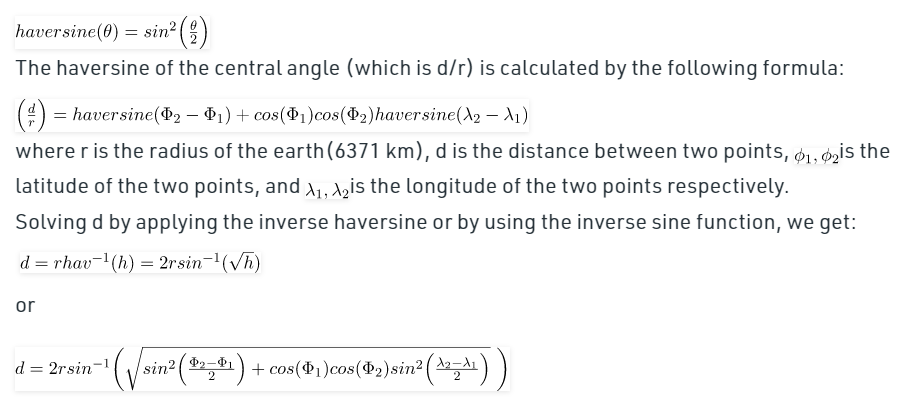

In [28]:
# Finding great circle distance in kilometers between customer location to merchant location in degrees latitude and degrees longitude

def haversine_def(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    haver = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    dist = 2 * np.arcsin(np.sqrt(haver)) 
    km = 6371*dist # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return km

In [29]:
df_train['distance'] = np.round(haversine_def(df_train['long'],df_train['lat'],df_train['merch_long'],df_train['merch_lat']),2)
df_test['distance'] = np.round(haversine_def(df_train['long'],df_train['lat'],df_train['merch_long'],df_train['merch_lat']),2)

In [30]:
# Binary mapping on Gender feature
  
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

In [31]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,area,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans,cust_age_group,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,semi_urban,0,Tuesday,2019-01,2019-01-01,34.0,30.0,20-30,78.60
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,rural,0,Tuesday,2019-01,2019-01-01,44.0,40.0,30-40,30.21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,semi_urban,0,Tuesday,2019-01,2019-01-01,60.0,56.0,50-60,108.21
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,semi_urban,0,Tuesday,2019-01,2019-01-01,55.0,51.0,50-60,95.67
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,rural,0,Tuesday,2019-01,2019-01-01,36.0,32.0,30-40,77.56


**Historic transaction data**

Historical variables can be derived from a given transactional data using nodes/features[customer, product, ....] involved in a given transaction. 

They help in improving the model performance as the current behaviour of the nodes in the transaction will be more correleated with historical behaviour of the node.

For example, the average order value of a customer can be extracted using the transactions that were made before the current transaction. 

Here, we are derving two historic transaction varaiables 
- Average transaction value of customers in the last 60 days
- Number of customer transaction in the last 60 days  

**TRAIN DATA**

In [32]:
df_train.index = df_train['trans_date_trans_time']
df_train = df_train.sort_index()
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,area,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans,cust_age_group,distance
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,semi_urban,0,Tuesday,2019-01,2019-01-01,34.0,30.0,20-30,78.60
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,rural,0,Tuesday,2019-01,2019-01-01,44.0,40.0,30-40,30.21
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,semi_urban,0,Tuesday,2019-01,2019-01-01,60.0,56.0,50-60,108.21
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,semi_urban,0,Tuesday,2019-01,2019-01-01,55.0,51.0,50-60,95.67
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,rural,0,Tuesday,2019-01,2019-01-01,36.0,32.0,30-40,77.56


In [33]:
# Number of customer transactions in the last 60 days 
df_train['agg'] = 1
df_hist_trans_60d = df_train .groupby(['cc_num'])['agg'].rolling('60D').count().shift().reset_index().fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [34]:
# Average transaction value of customers in the last 60 days 
df_hist_trans_amt_avg_60d = df_train .groupby(['cc_num'])['amt'].rolling('60D').sum().shift(1).reset_index().fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])['hist_trans_avg_amt_60d'].mean().reset_index()

In [35]:
# Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time'] using left join

df_train['trans_date'] = df_train['trans_date_trans_time'].dt.date
df_train = df_train.merge(df_hist_trans_amt_avg_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')
df_train = df_train.merge(df_hist_trans_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')

**TEST DATA**

In [36]:
df_test.index = df_test['trans_date_trans_time']
df_test = df_test.sort_index()
df_test.head()

# Number of customer transcations in the last 60 days 
df_test['agg'] = 1
df_hist_trans_60d = df_test .groupby(['cc_num'])['agg'].rolling('60D').count().shift().reset_index().fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

# Average order value of customers in the last 60 days 
df_hist_trans_amt_avg_60d = df_test .groupby(['cc_num'])['amt'].rolling('60D').sum().shift(1).reset_index().fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])['hist_trans_avg_amt_60d'].mean().reset_index()

# Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time'] using left join
df_test['trans_date'] = df_test['trans_date_trans_time'].dt.date
df_test = df_test.merge(df_hist_trans_amt_avg_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')
df_test = df_test.merge(df_hist_trans_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')

In [37]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,area,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans,cust_age_group,distance,agg,hist_trans_avg_amt_60d,hist_trans_60d
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,urban,12,Sunday,2020-06,2020-06-21,54.0,52.0,20-30,78.60,1,10060.720000,1.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,rural,12,Sunday,2020-06,2020-06-21,32.0,30.0,30-40,30.21,1,1018.875000,1.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,urban,12,Sunday,2020-06,2020-06-21,51.0,49.0,50-60,108.21,1,6565.473333,1.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,urban,12,Sunday,2020-06,2020-06-21,34.0,32.0,50-60,95.67,1,13428.150000,1.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,semi_urban,12,Sunday,2020-06,2020-06-21,67.0,64.0,30-40,77.56,1,3452.952500,1.0


**Checking value counts of categorical features for skewness**

In [38]:
df_train.category.value_counts(normalize=True)*100

gas_transport     10.153585
grocery_pos        9.535003
home               9.494669
shopping_pos       8.997783
kids_pets          8.717296
shopping_net       7.522548
entertainment      7.250390
food_dining        7.053502
personal_care      6.999287
health_fitness     6.623017
misc_pos           6.143020
misc_net           4.880714
grocery_net        3.505273
travel             3.123913
Name: category, dtype: float64

In [39]:
df_train.gender.value_counts(normalize=True)*100

0    54.744867
1    45.255133
Name: gender, dtype: float64

In [40]:
df_train.state.value_counts(normalize=True)*100

TX    7.316868
NY    6.439624
PA    6.157827
CA    4.346502
OH    3.584553
MI    3.559412
IL    3.335608
FL    3.290801
AL    3.161085
MO    2.961652
MN    2.445794
AR    2.400524
NC    2.334124
WI    2.264870
VA    2.255770
SC    2.251142
KY    2.196001
IN    2.126979
IA    2.081092
OK    2.056876
MD    2.020013
GA    2.009987
WV    1.981298
NJ    1.897391
NE    1.863844
KS    1.773459
MS    1.634025
LA    1.616828
WY    1.490119
WA    1.459425
OR    1.434207
TN    1.353770
ME    1.272871
NM    1.265313
ND    1.140301
CO    1.070430
MA    0.954441
SD    0.950431
VT    0.907552
MT    0.906472
AZ    0.830586
UT    0.825110
NH    0.638402
CT    0.593981
NV    0.432414
ID    0.427632
DC    0.278636
HI    0.197351
AK    0.163495
RI    0.042416
DE    0.000694
Name: state, dtype: float64

In [41]:
df_train.job.value_counts(normalize=True)*100

Film/video editor                 0.754160
Exhibition designer               0.709430
Naval architect                   0.669713
Surveyor, land/geomatics          0.669404
Materials engineer                0.637785
                                    ...   
Armed forces technical officer    0.000617
Information officer               0.000617
Warehouse manager                 0.000540
Contracting civil engineer        0.000540
Ship broker                       0.000540
Name: job, Length: 494, dtype: float64

In [42]:
df_train.merchant.value_counts(normalize=True)*100

fraud_Kilback LLC                       0.339561
fraud_Cormier LLC                       0.281412
fraud_Schumm PLC                        0.280255
fraud_Kuhn LLC                          0.270692
fraud_Boyer PLC                         0.269381
                                          ...   
fraud_Treutel-King                      0.059768
fraud_Douglas, DuBuque and McKenzie     0.059768
fraud_Medhurst, Labadie and Gottlieb    0.058534
fraud_Reichert-Weissnat                 0.058072
fraud_Hahn, Douglas and Schowalter      0.056066
Name: merchant, Length: 693, dtype: float64

In [43]:
df_train.city.value_counts(normalize=True)*100

Birmingham     0.433185
San Antonio    0.395627
Utica          0.393699
Phoenix        0.391386
Meridian       0.390229
                 ...   
Streator       0.000540
Norfolk        0.000540
Bruce          0.000540
Chattanooga    0.000540
Vacaville      0.000540
Name: city, Length: 894, dtype: float64

In [44]:
df_train.zip.value_counts(normalize=True)*100

73754    0.281181
34112    0.278636
48088    0.277402
82514    0.272003
49628    0.240847
           ...   
78208    0.000540
38915    0.000540
37411    0.000540
10018    0.000540
61364    0.000540
Name: zip, Length: 970, dtype: float64

In [45]:
df_train.area.value_counts(normalize=True)*100

semi_urban    49.796981
rural         25.259761
urban         24.943259
Name: area, dtype: float64

In [46]:
df_train.trans_hour.value_counts(normalize=True)*100

23    5.175082
22    5.165674
18    5.093875
16    5.068811
21    5.053926
19    5.051998
17    5.047525
15    5.042975
13    5.037037
12    5.032641
20    5.020379
14    5.003952
1     3.306071
3     3.298359
2     3.289645
8     3.277999
0     3.277768
6     3.262190
10    3.259953
7     3.254709
9     3.253321
5     3.252241
11    3.245378
4     3.228488
Name: trans_hour, dtype: float64

In [47]:
df_train.trans_day_of_week.value_counts(normalize=True)*100

Monday       19.610311
Sunday       19.324734
Saturday     15.497870
Tuesday      12.356759
Friday       11.743266
Thursday     11.358667
Wednesday    10.108393
Name: trans_day_of_week, dtype: float64

In [48]:
df_train.cust_age_group.value_counts(normalize=True)*100

40-50         23.021420
30-40         22.207338
60 - Above    19.634373
20-30         16.974801
50-60         14.250988
10-20          3.911080
Name: cust_age_group, dtype: float64

In [49]:
df_train.distance.value_counts(normalize=True)*100

82.37     0.015655
87.05     0.015578
84.78     0.015501
86.06     0.015424
83.70     0.015424
            ...   
0.96      0.000077
147.77    0.000077
1.01      0.000077
144.26    0.000077
146.60    0.000077
Name: distance, Length: 14455, dtype: float64

Skewness is not observed in the value counts of the features
- gas_transport category has highest number of transactions
- Female customers have highest number of transactions
- semi_urban  area has highest number of transactions
- Sunday and Monday has highest number of transactions
- 30-50 age group have highest number of transactions

**Step 2: Exploratory Data Analysis**

**Univariate/Bivariate Analysis**

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   trans_date_trans_time   1296675 non-null  datetime64[ns]
 1   cc_num                  1296675 non-null  int64         
 2   merchant                1296675 non-null  object        
 3   category                1296675 non-null  object        
 4   amt                     1296675 non-null  float64       
 5   first                   1296675 non-null  object        
 6   last                    1296675 non-null  object        
 7   gender                  1296675 non-null  int64         
 8   street                  1296675 non-null  object        
 9   city                    1296675 non-null  object        
 10  state                   1296675 non-null  object        
 11  zip                     1296675 non-null  int64         
 12  lat           

In [51]:
def univariate_cat(col):
  plt.figure(figsize=(15,5))
  #df_train[col].value_counts().plot.bar()

  plt.subplot(1,2,1)
  sns.set_style("whitegrid")
  sns.countplot(df_train[col])
  plt.xticks(rotation = 90)

  plt.subplot(1,2,2)
  sns.barplot(x=col, y='cc_num' ,hue="is_fraud", data=df_train.groupby([col,'is_fraud']).agg({'cc_num':'count'}).reset_index())
  plt.xticks(rotation = 90)
  plt.show();


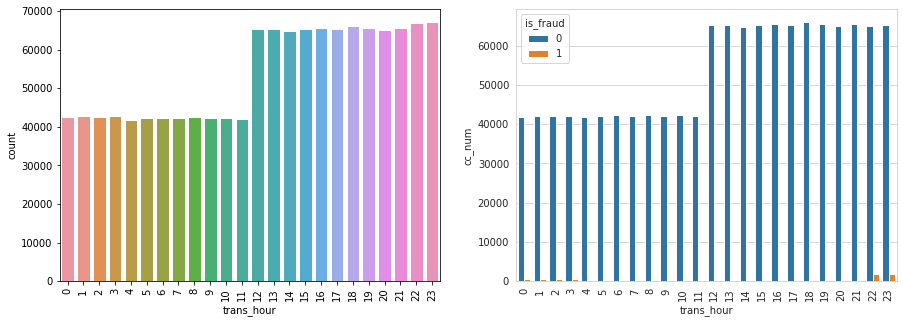

In [52]:
univariate_cat('trans_hour')

Maximum transactions are done between 12 PM to 11 PM.

Fradulent transactions are observed during 10 PM - 3 AM duration

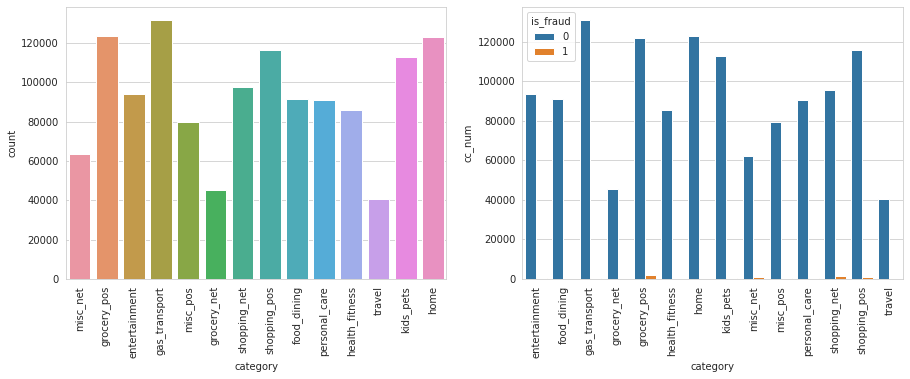

In [53]:
univariate_cat('category')

Highest number of transactions are for gas transport, home and grocery_pos categories and least for travel.

Fraudulent transactions are observed for grocery_pos, misc_net, shopping_net and shopping_pos categories.


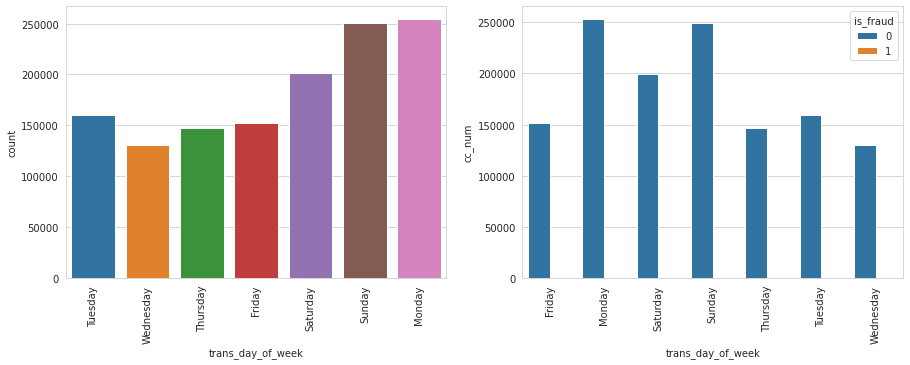

In [54]:
univariate_cat('trans_day_of_week')

Highest credit card transactions occur on Sunday and Monday

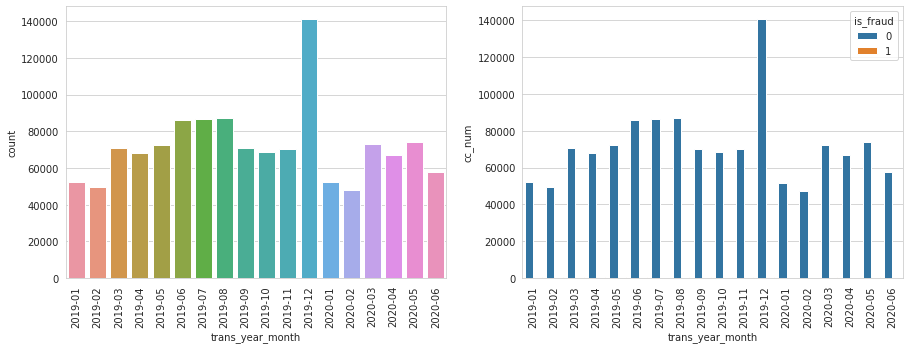

In [55]:
univariate_cat('trans_year_month')

Highest number of transcations occurred in December 2019 and lowest occurred in February 2020

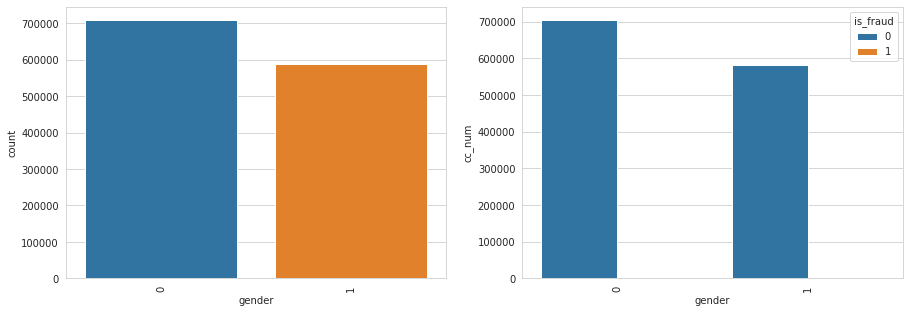

In [56]:
univariate_cat('gender')

Females customers are higher than male customers


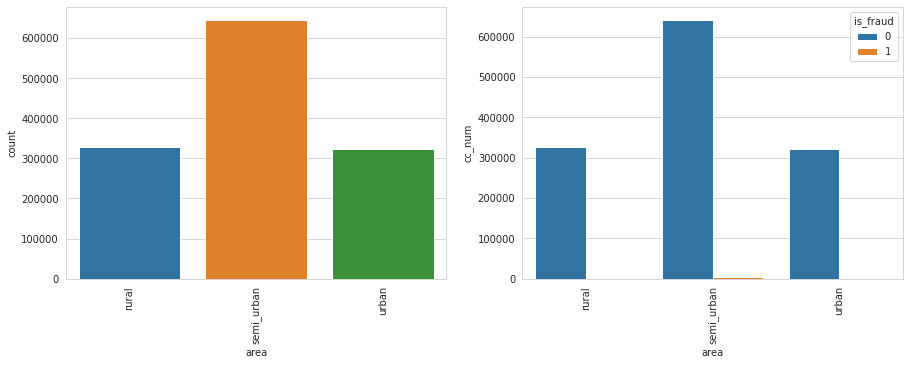

In [57]:
univariate_cat('area')

# If the population is less than 25% -> rural, 25-75% -> semi-urban, and more than 75% -> urban
#df_train['area'] = pd.qcut(df_train.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

Semi-urban areas have highest number of transactions and fraudulent transactions

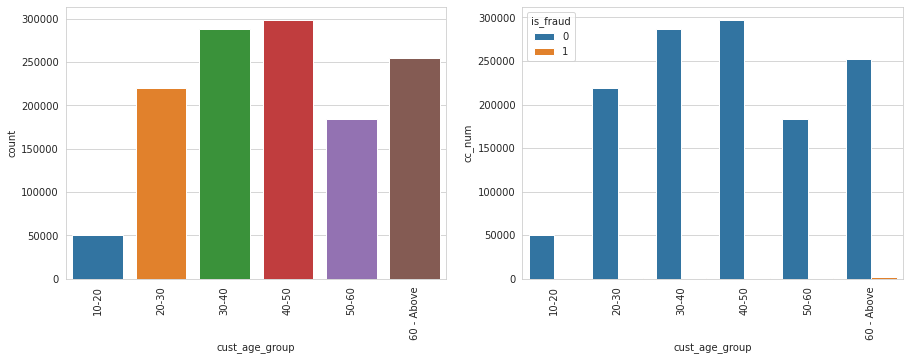

In [58]:
univariate_cat('cust_age_group')

Highest number of transactions are observed in 30-50 age category.

Fraudulent activities are detected when customer is beyond 60 years old

In [59]:
def univariate_num(col):
  plt.figure(figsize=(15,5))

  sns.set_style("whitegrid")
  sns.distplot(df_train[col])
  #plt.xticks(rotation = 90)
  plt.show();


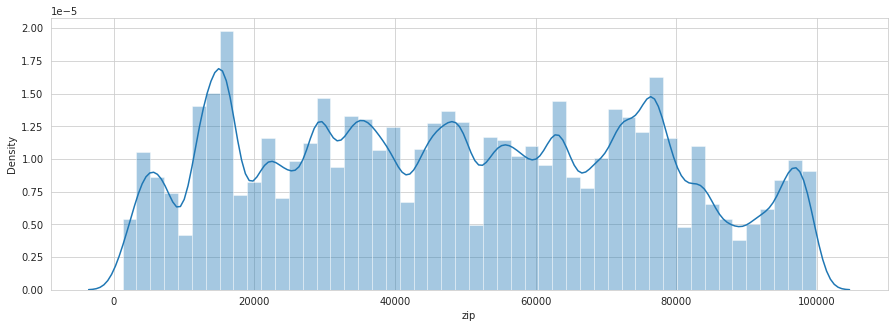

In [60]:
univariate_num('zip')

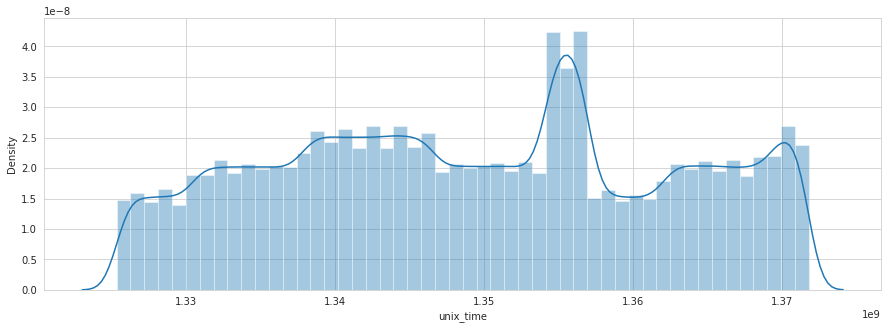

In [61]:
univariate_num('unix_time')

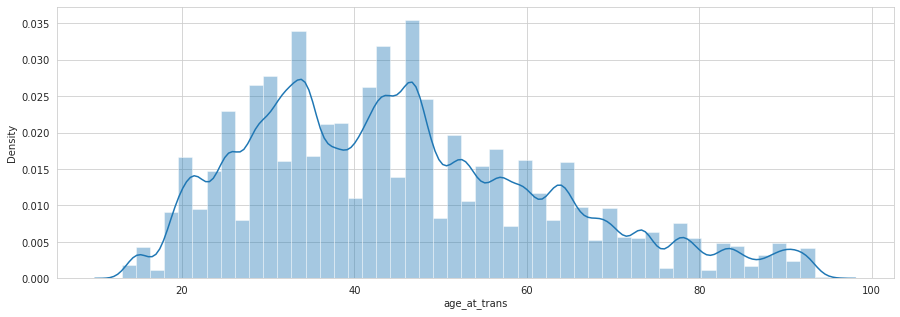

In [62]:
univariate_num('age_at_trans')

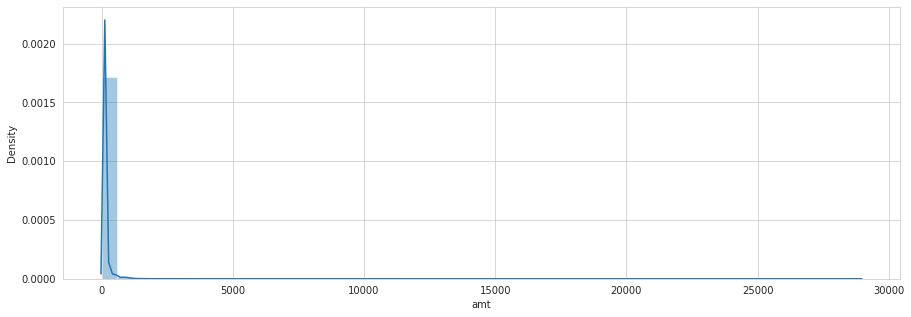

In [63]:
univariate_num('amt')

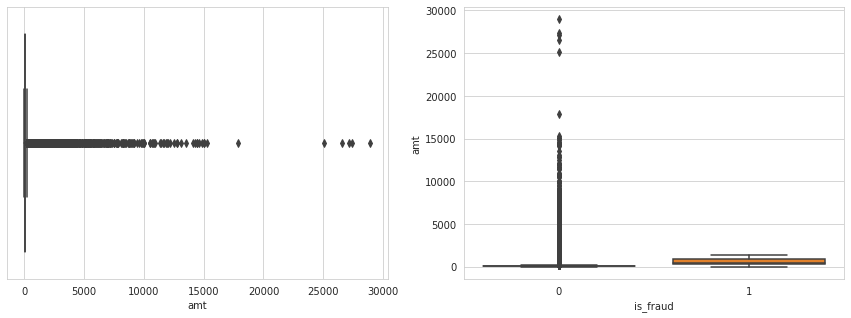

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df_train['amt'])

plt.subplot(1,2,2)
sns.boxplot(x='is_fraud', y='amt', data=df_train)

plt.show()

In [65]:
pd.concat([df_train['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df_train.loc[df_train['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
df_train.loc[df_train['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.035104e+01,6.766711e+01,531.320092
2,std,1.603160e+02,1.540080e+02,390.560070
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.752000e+01,4.728000e+01,396.505000
5,95%,1.963100e+02,1.899000e+02,1083.985000
6,99.9%,1.499254e+03,1.503696e+03,1291.038400
7,max,2.894890e+04,2.894890e+04,1376.040000


Fraud transaction amount is very high in comparison to non-fradulent transaction by looking at the mean and the pecentile data

**Visualising fraud and non-fraud transaction amounts**

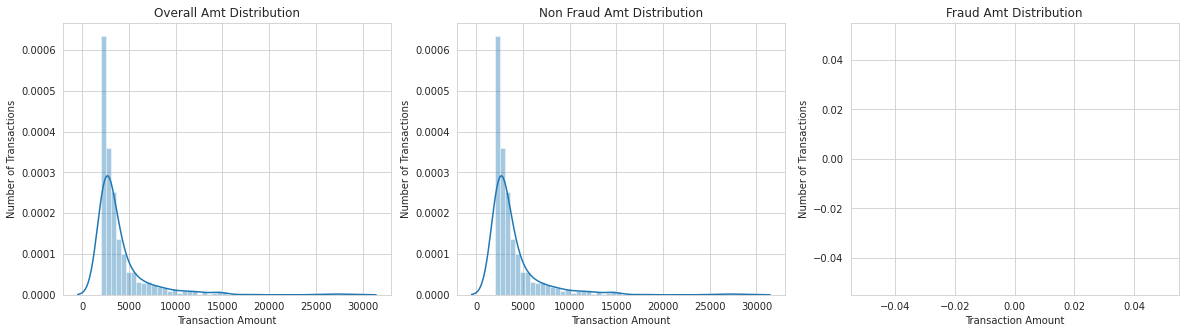

In [66]:
fig, ax = plt.subplots(1,3,figsize=(20,5))


plt.subplot(1,3,1)
sns.distplot(df_train[df_train.amt>=2000].amt, bins=50)
plt.title('Overall Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,2)
sns.distplot(df_train[(df_train.is_fraud==0) & (df_train.amt>=2000)].amt, bins=50)
plt.title('Non Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,3)
sns.distplot(df_train[(df_train.is_fraud==1) & (df_train.amt>=2000)].amt, bins=50)
plt.title('Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.show()


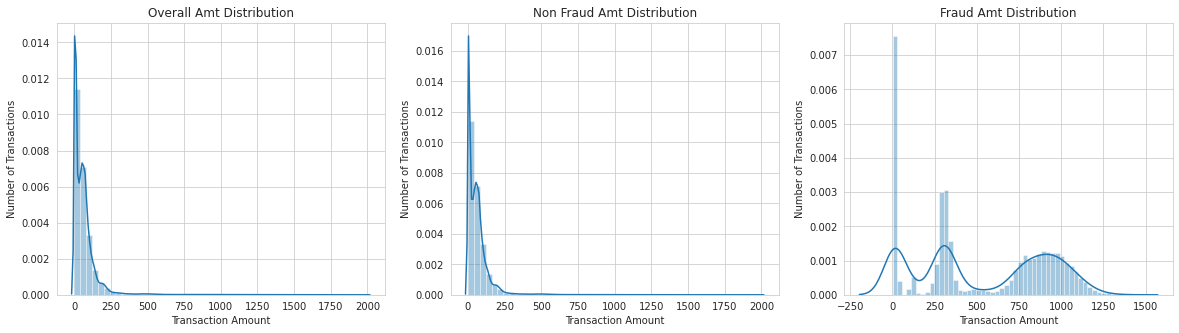

In [67]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_train[df_train.amt<=2000].amt, bins=50)
plt.title('Overall Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,2)
sns.distplot(df_train[(df_train.is_fraud==0) & (df_train.amt<=2000)].amt, bins=50)
plt.title('Non Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,3)
sns.distplot(df_train[(df_train.is_fraud==1) & (df_train.amt<=2000)].amt, bins=50)
plt.title('Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.show()


- Genuine transaction amount ranges between 1 and 29,000 
- Fraudulent transactions ranges between 1 and 1300 as seen from the above graph. 
- Also, high value fraudulent transactions are not observed in the data.

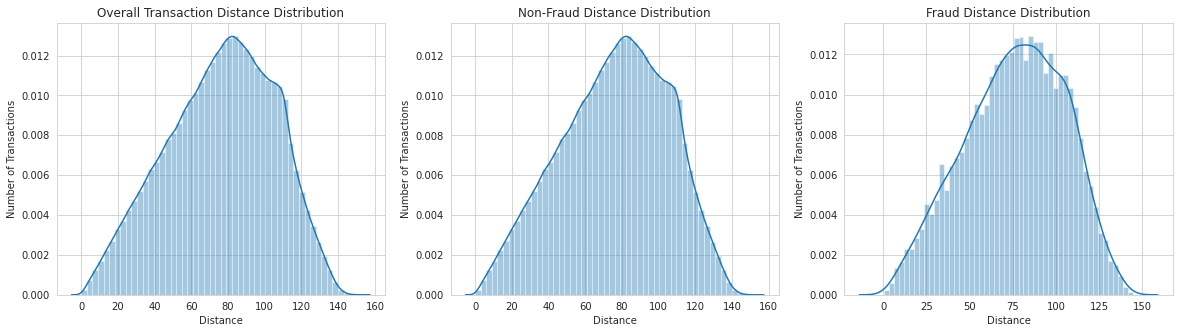

In [68]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df_train.distance, bins=50)
plt.title('Overall Transaction Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,2)
sns.distplot(df_train[df_train.is_fraud==0].distance, bins=50)
plt.title('Non-Fraud Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,3)
sns.distplot(df_train[df_train.is_fraud==1].distance, bins=50)
plt.title('Fraud Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Number of Transactions')

plt.show()


In [69]:
pd.concat([df_train['distance'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'distance':'Overall distance Distribution'}),
df_train.loc[df_train['is_fraud']==0,['distance']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'distance':'Non-Fraud distance Distribution'}),
df_train.loc[df_train['is_fraud']==1,['distance']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'distance':'Fraud distance Distribution'})],axis=1)

,Row Type,Overall distance Distribution,Non-Fraud distance Distribution,Fraud distance Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.611465e+01,7.611376e+01,76.268288
2,std,2.911693e+01,2.911905e+01,28.752614
3,min,2.000000e-02,2.000000e-02,0.740000
4,50%,7.823000e+01,7.823000e+01,77.935000
5,95%,1.205000e+02,1.205000e+02,120.155000
6,99.9%,1.400000e+02,1.400000e+02,140.019700
7,max,1.521200e+02,1.521200e+02,144.520000


- Highest number of frauds are committed when the distance between genuine customer and the merchant is 76 kms. 
- The distance distribution is similar for fraudulent and non-fraudulent transactions.

In [70]:
df_gender = df_train[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']
df_gender.head()

df_fraud = df_train[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud.columns = ['Gender','is_fraud','count']
df_fraud = df_fraud.merge(df_gender[['Gender','gender_count']],how='inner',left_on='Gender',right_on='Gender')
df_fraud['percent'] = (df_fraud['count']/df_fraud['gender_count'])*100
df_fraud.head()

,Gender,is_fraud,count,gender_count,percent
0,0,0,706128,709863,99.473842
1,0,1,3735,709863,0.526158
2,1,0,583041,586812,99.357375
3,1,1,3771,586812,0.642625


Male customers are deceived a little more than female customers although female customers are higher in number

In [71]:
df_gender = df_train[['category','trans_num']].groupby(['category']).count().reset_index()
df_gender.columns = ['category','category_count']
df_gender.head()

df_fraud = df_train[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud.columns = ['category','is_fraud','count']
df_fraud = df_fraud.merge(df_gender[['category','category_count']],how='inner',left_on='category',right_on='category')
df_fraud['percent'] = (df_fraud['count']/df_fraud['category_count'])*100
df_fraud

,category,is_fraud,count,category_count,percent
0,entertainment,0,93781,94014,99.752165
1,entertainment,1,233,94014,0.247835
2,food_dining,0,91310,91461,99.834902
3,food_dining,1,151,91461,0.165098
4,gas_transport,0,131041,131659,99.530606
5,gas_transport,1,618,131659,0.469394
6,grocery_net,0,45318,45452,99.705183
7,grocery_net,1,134,45452,0.294817
8,grocery_pos,0,121895,123638,98.590239
9,grocery_pos,1,1743,123638,1.409761


Shopping and grocery categories have highest occurences of fraud transactions.

**Analysing trends in fradulent transactions**

In [72]:
fraud = df_train[(df_train['is_fraud']==1)] 

In [73]:
def fraud_univariate_cat(col):
  plt.figure(figsize=(30,5))

  sns.set_style("whitegrid")
  sns.countplot(fraud[col])
  plt.xticks(rotation = 90)


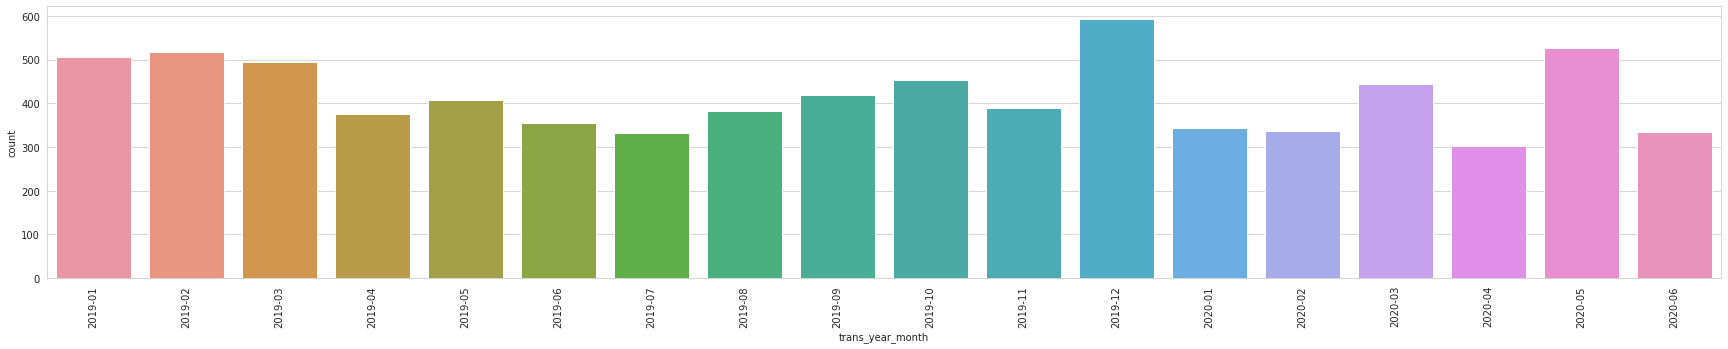

In [74]:
fraud_univariate_cat('trans_year_month')

- There were more fraudulent transactions in 2019 
- Highest number of frauds were seen in December of 2019 and May of 2020


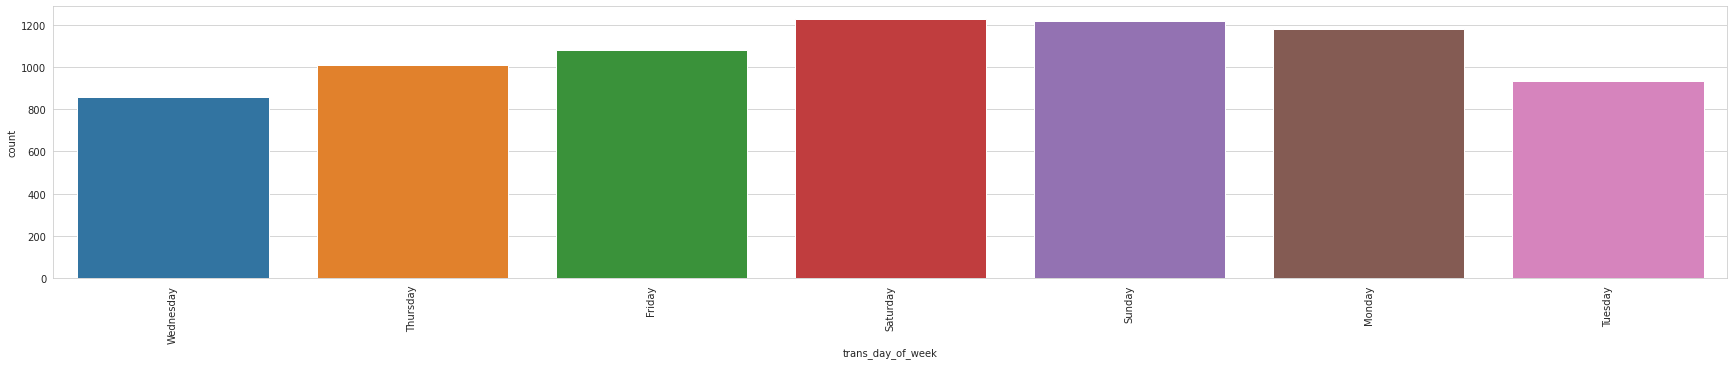

In [75]:
fraud_univariate_cat('trans_day_of_week')

Fraudulent transactions are more on Sunday, Saturday and Monday


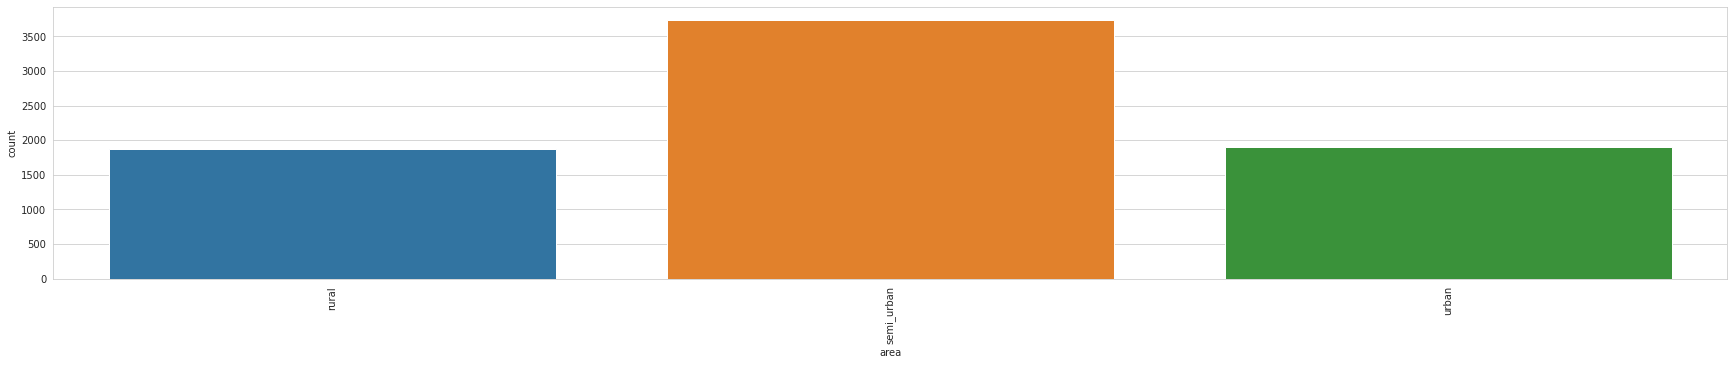

In [76]:
fraud_univariate_cat('area')

More fraudulent transactions are observed in the semi-urban areas than rural and urban areas

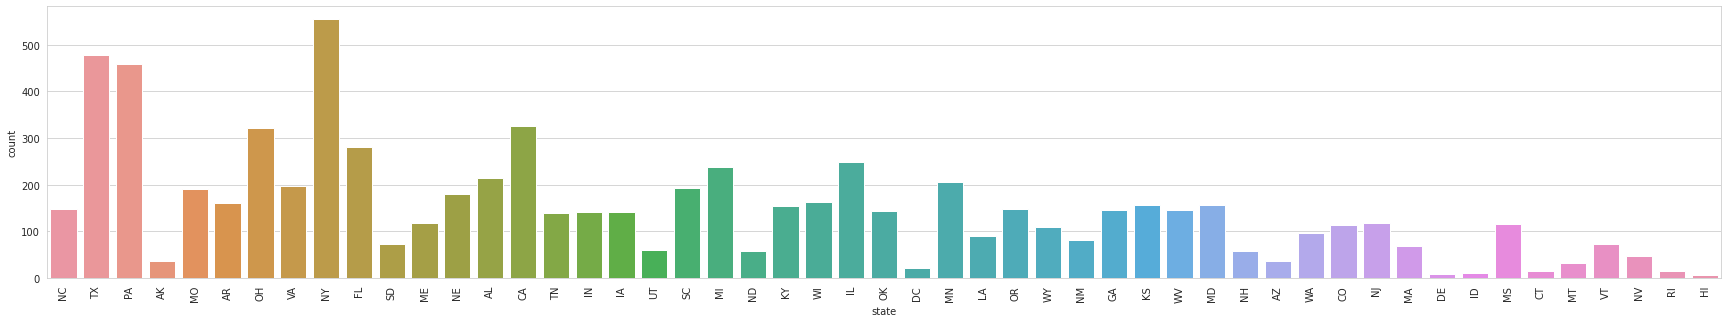

In [77]:
fraud_univariate_cat('state')

Higher number of frauds are observed for customers from NY followed by TX and PA states. 

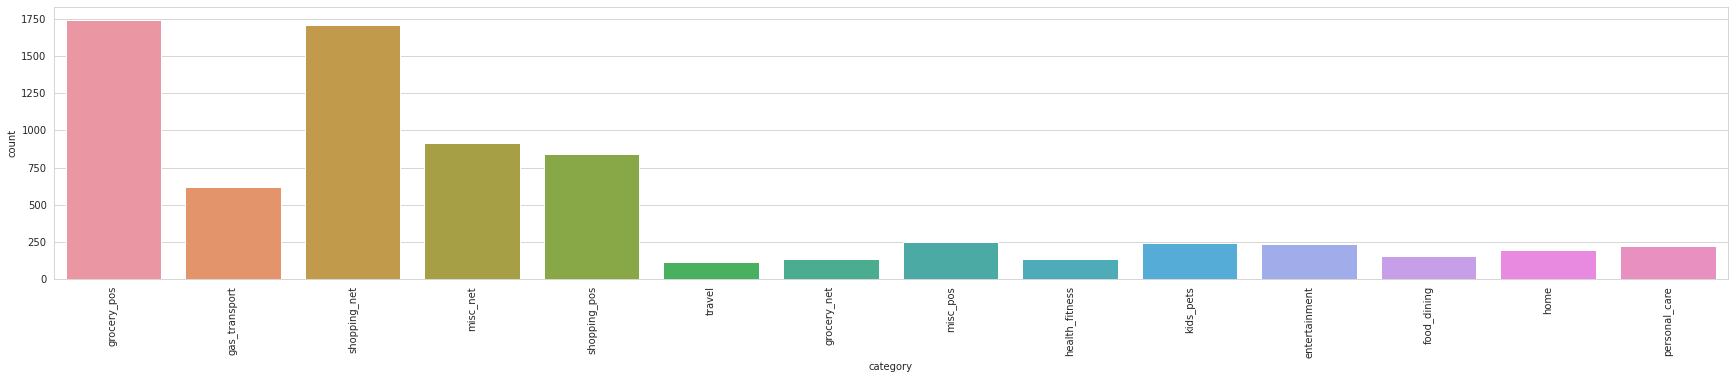

In [78]:
fraud_univariate_cat('category')

Highest frauds are observed in grocery and shopping categories

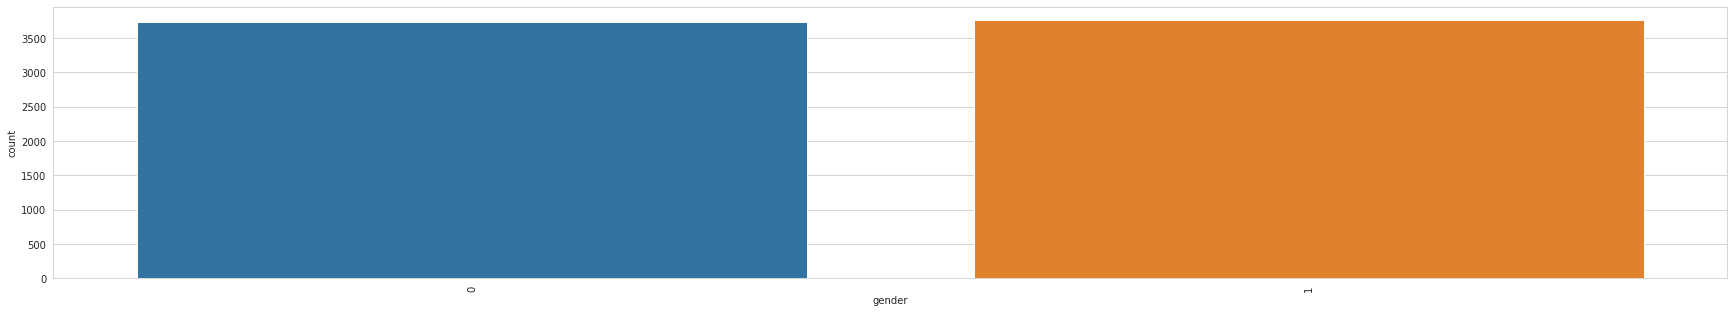

In [79]:
fraud_univariate_cat('gender')

There is no clear distinction in the number of fraudulent transcations based on gender

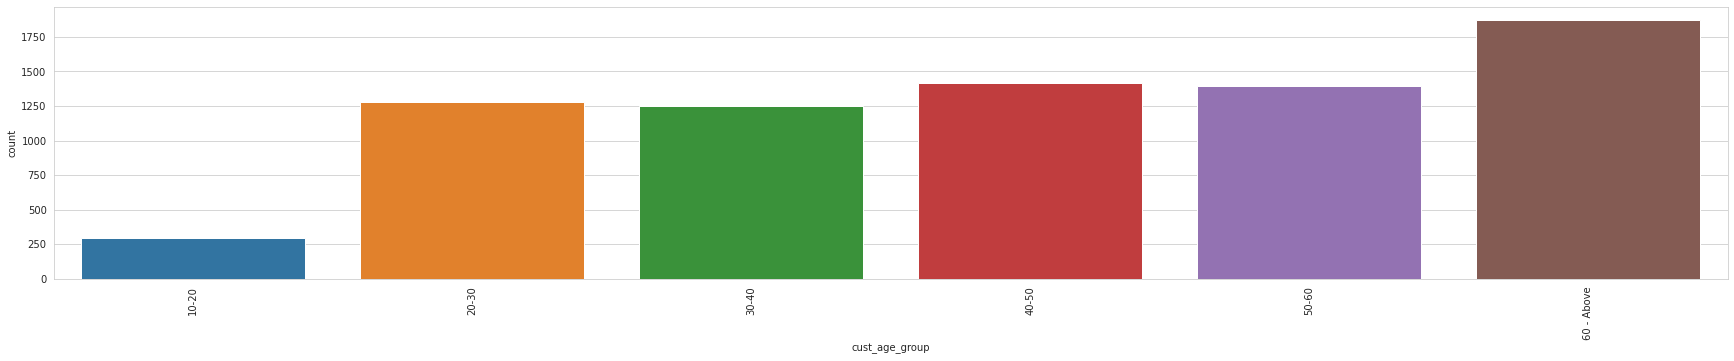

In [80]:
fraud_univariate_cat('cust_age_group')

Fraudulent activities are higher when customer is beyond 60 years old.

In [81]:
fraud.city.value_counts(normalize=True)*100

Houston           0.519584
Warren            0.439648
Naples            0.386358
Huntsville        0.386358
Dallas            0.359712
                    ...   
Grandview         0.039968
Phoenix           0.026645
Denham Springs    0.026645
Kilgore           0.026645
Phenix City       0.026645
Name: city, Length: 702, dtype: float64

In [82]:
fraud.merchant.value_counts(normalize=True)*100

fraud_Rau and Sons                     0.652811
fraud_Kozey-Boehm                      0.639488
fraud_Cormier LLC                      0.639488
fraud_Vandervort-Funk                  0.626166
fraud_Kilback LLC                      0.626166
                                         ...   
fraud_Hagenes, Kohler and Hoppe        0.013323
fraud_Dach-Borer                       0.013323
fraud_Mante, Luettgen and Hackett      0.013323
fraud_Prosacco, Kreiger and Kovacek    0.013323
fraud_Bahringer-Larson                 0.013323
Name: merchant, Length: 679, dtype: float64

In [83]:
fraud.zip.value_counts(normalize=True)*100

15010    0.319744
48088    0.306422
16034    0.279776
82514    0.279776
68375    0.253131
           ...   
85020    0.026645
75662    0.026645
33811    0.026645
70726    0.026645
28405    0.026645
Name: zip, Length: 754, dtype: float64

In [84]:
fraud.job.value_counts(normalize=True)*100

Materials engineer                      0.826006
Trading standards officer               0.746070
Naval architect                         0.706102
Exhibition designer                     0.679456
Surveyor, land/geomatics                0.666134
                                          ...   
Statistician                            0.039968
Chartered loss adjuster                 0.039968
Health physicist                        0.039968
Contractor                              0.026645
English as a second language teacher    0.026645
Name: job, Length: 443, dtype: float64

In [85]:
fraud.distance.value_counts(normalize=True)*100

68.16     0.079936
78.75     0.079936
91.50     0.079936
70.74     0.066613
80.59     0.066613
            ...   
55.30     0.013323
100.15    0.013323
47.09     0.013323
52.03     0.013323
42.50     0.013323
Name: distance, Length: 5395, dtype: float64

In [86]:
fraud.age_at_trans.value_counts(normalize=True)*100

53.0    2.664535
32.0    2.504663
58.0    2.411404
28.0    2.398082
48.0    2.331468
          ...   
16.0    0.279776
18.0    0.253131
76.0    0.226485
14.0    0.159872
88.0    0.133227
Name: age_at_trans, Length: 80, dtype: float64

Skewness is not observed in few features for fradulent transactions after observing their value counts

**Distribution of target variable** - Checking class imbalance

**TRAIN DATA**

In [87]:
df_fraud=df_train[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=np.round((df_fraud['count']/df_fraud['count'].sum())*100,2)
df_fraud

,is_fraud,count,percentage
0,0,1289169,99.42
1,1,7506,0.58


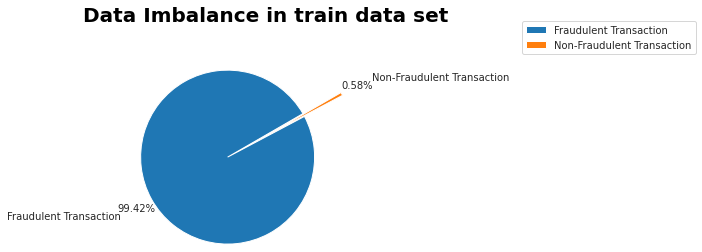

In [88]:
label = ['Fraudulent Transaction','Non-Fraudulent Transaction']
values = [df_fraud['percentage'][0], df_fraud['percentage'][1]]

explode = (0.5, 0)
fig1, ax1 = plt.subplots()

ax1.pie(values,labels=label, explode=explode,autopct='%0.2f%%',shadow=False, startangle=30, pctdistance=1.2, labeldistance=1.4)
plt.title('Data Imbalance in train data set',fontsize=20, color='black', fontweight='bold')
ax1.legend(bbox_to_anchor=(2.5, 1.05))
plt.show()

**TEST DATA**

In [89]:
df_fraud=df_test[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=np.round((df_fraud['count']/df_fraud['count'].sum())*100,2)
df_fraud

,is_fraud,count,percentage
0,0,553574,99.61
1,1,2145,0.39


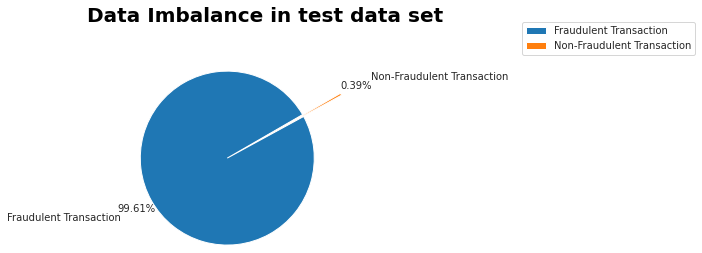

In [90]:
label = ['Fraudulent Transaction','Non-Fraudulent Transaction']
values = [df_fraud['percentage'][0], df_fraud['percentage'][1]]

explode = (0.5, 0)
fig1, ax1 = plt.subplots()
#ax1.pie(values,labels=label, explode=explode,autopct='%0.2f%%',shadow=False, startangle=340, pctdistance=1.2,labeldistance=1.4)
#ax1.axis('equal') 

ax1.pie(values,labels=label, explode=explode,autopct='%0.2f%%',shadow=False, startangle=30, pctdistance=1.2, labeldistance=1.4)
plt.title('Data Imbalance in test data set',fontsize=20, color='black', fontweight='bold')
ax1.legend(bbox_to_anchor=(2.5, 1.05))
plt.show()

The train and test data sets are **highly imbalanced**

**Heatmap to see correlation between variables**

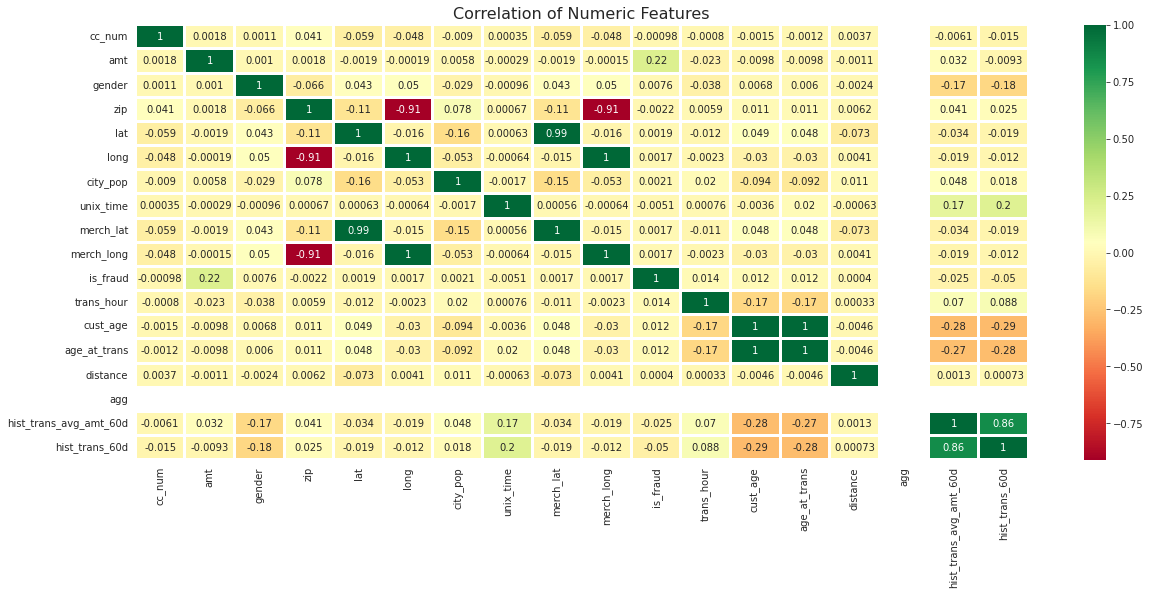

In [91]:
f , ax = plt.subplots(figsize = (20,8))
plt.title('Correlation of Numeric Features',y=1,size=16)
#sns.heatmap(df_train.corr(),linewidths=2, linecolor='yellow', vmax =1,annot= True)
sns.heatmap(df_train.corr(),linewidths=2, vmax =1,annot= True, cmap='RdYlGn')
plt.show()

We see high correlations between few variables.
1. gender and historical variables
2. age during transaction and transaction hour
3. age during transaction and historical variables





In [92]:
# Dropping fields not necessary for model building

#drop_cols = ['trans_date_trans_time','cc_num','first','last','street','city','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long','cust_age','agg','age_at_trans','trans_date', 'trans_year_month','merchant','city','zip','job','state']
#df_train = df_train.drop(drop_cols,axis=1)
#df_test = df_test.drop(drop_cols,axis=1)

**Data Preparation : One Hot-Encoding**

In [93]:
# Dummy Variable Creation for Categorical variables


category_onehot = pd.get_dummies(df_train.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df_train.gender, prefix='gender', drop_first=True)
area_onehot = pd.get_dummies(df_train.area, prefix='area',drop_first=True)
cust_age_group_onehot = pd.get_dummies(df_train.cust_age_group, prefix='age',drop_first=True)
trans_hour_onehot = pd.get_dummies(df_train.trans_hour, prefix='hour',drop_first=True)
trans_day_of_week_onehot = pd.get_dummies(df_train.trans_day_of_week, prefix='week',drop_first=True)
#state_onehot = pd.get_dummies(df_train.state, prefix='state',drop_first=True)


# Merging the Dataframes
df1 = pd.concat([df_train, category_onehot,gender_onehot,area_onehot,cust_age_group_onehot,trans_hour_onehot,trans_day_of_week_onehot], axis=1)


# Dropping the variables as dummies have been created for the below variables
df1 = df1.drop(['category','gender','area','cust_age_group','trans_hour','trans_day_of_week'] ,axis =1)

In [94]:
# Dropping unnecessary columns

drop_cols = ['trans_date_trans_time','cc_num','first','last','street','city','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long','cust_age','agg','age_at_trans','trans_date', 'trans_year_month','merchant','city','zip','job','state']
df1 = df1.drop(drop_cols,axis=1)


In [95]:
df1.head()

,amt,is_fraud,distance,hist_trans_avg_amt_60d,hist_trans_60d,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_1,area_semi_urban,area_urban,age_20-30,age_30-40,age_40-50,age_50-60,age_60 - Above,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,4.97,0,78.60,2028.123333,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,107.23,0,30.21,625.771000,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,220.11,0,108.21,3023.400000,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45.00,0,95.67,6102.775000,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,41.96,0,77.56,3546.330000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [96]:
# Finding Correlated values of all variables

corr=df1.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)

In [97]:
# Finding Top 5 Negatively  Correlated values

corrdf.sort_values(by='Correlation',ascending=True).head(5)

,Var1,Var2,Correlation
1119,area_urban,area_semi_urban,-0.57
1287,age_40-50,age_30-40,-0.29
1398,age_60 - Above,age_40-50,-0.27
1397,age_60 - Above,age_30-40,-0.26
1286,age_40-50,age_20-30,-0.25


In [98]:
#finding Top 5 Positively Correlated values

corrdf.sort_values(by='Correlation',ascending=False).head(5)

,Var1,Var2,Correlation
223,hist_trans_60d,hist_trans_avg_amt_60d,0.86
55,is_fraud,amt,0.22
1213,age_30-40,hist_trans_avg_amt_60d,0.17
1268,age_40-50,hist_trans_avg_amt_60d,0.15
1269,age_40-50,hist_trans_60d,0.13


We see high correlations between few variables.

- is_fraud and transaction amount
- age during transaction and historical variables

In [99]:
# Dummy variable creation for categorical variables
category_onehot = pd.get_dummies(df_test.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df_test.gender, prefix='gender', drop_first=True)
area_onehot = pd.get_dummies(df_test.area, prefix='area',drop_first=True)
cust_age_group_onehot = pd.get_dummies(df_test.cust_age_group, prefix='age',drop_first=True)
trans_hour_onehot = pd.get_dummies(df_test.trans_hour, prefix='hour',drop_first=True)
trans_day_of_week_onehot = pd.get_dummies(df_test.trans_day_of_week, prefix='week',drop_first=True)
#state_onehot = pd.get_dummies(df_test.state, prefix='state',drop_first=True)


# Merging the Dataframes
df2 = pd.concat([df_test, category_onehot,gender_onehot,area_onehot,cust_age_group_onehot,trans_hour_onehot,trans_day_of_week_onehot], axis=1)


# Dropping the variables as dummies have been created for the below variables
df2 = df2.drop(['category','gender','area','cust_age_group','trans_hour','trans_day_of_week'] ,axis =1)

In [100]:
# Dropping unnecessary columns

drop_cols = ['trans_date_trans_time','cc_num','first','last','street','city','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long','cust_age','agg','age_at_trans','trans_date', 'trans_year_month','merchant','city','zip','job','state']
df2 = df2.drop(drop_cols,axis=1)

In [101]:
df2.shape

(555719, 55)

In [102]:
df1.shape

(1296675, 55)

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 55 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   is_fraud                 1296675 non-null  int64  
 2   distance                 1296675 non-null  float64
 3   hist_trans_avg_amt_60d   1296675 non-null  float64
 4   hist_trans_60d           1296675 non-null  float64
 5   category_food_dining     1296675 non-null  uint8  
 6   category_gas_transport   1296675 non-null  uint8  
 7   category_grocery_net     1296675 non-null  uint8  
 8   category_grocery_pos     1296675 non-null  uint8  
 9   category_health_fitness  1296675 non-null  uint8  
 10  category_home            1296675 non-null  uint8  
 11  category_kids_pets       1296675 non-null  uint8  
 12  category_misc_net        1296675 non-null  uint8  
 13  category_misc_pos        1296675 non-null 

**Data Preparation for Modeling**

In [104]:
from sklearn.preprocessing import StandardScaler

**StandardScaler**

It standardizes features by removing the mean and scaling to unit variance.Standardization of a dataset is a common requirement for many machine learning estimators- they might behave badly if the individual features do not more or less look like standard normally distributed data 

**Feature Scaling**

In [105]:
X_train=df1.drop("is_fraud", axis=1)
y_train=df1['is_fraud']

X_test=df2.drop("is_fraud", axis=1)
y_test=df2['is_fraud']

In [106]:
numericalFeatures=['amt','distance','hist_trans_avg_amt_60d','hist_trans_60d'	]

scaler = StandardScaler()
X_train[numericalFeatures] = scaler.fit_transform(X_train[numericalFeatures])
X_test[numericalFeatures] = scaler.transform(X_test[numericalFeatures])

**Checking the Skewness**

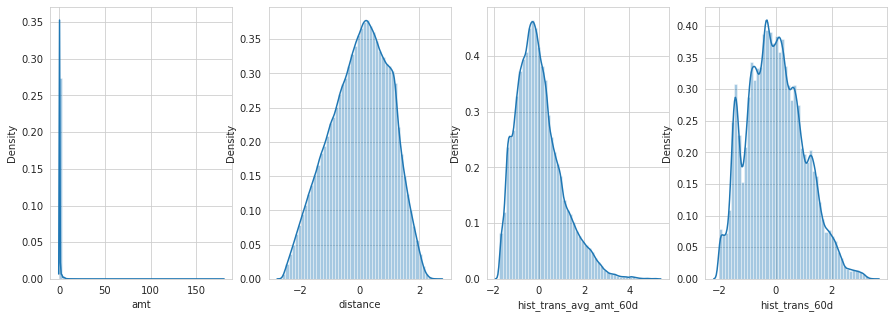

In [107]:
k=0
plt.figure(figsize=(15,5))

for col in numericalFeatures : 
    k=k+1
    plt.subplot(1,4,k)    
    sns.distplot(X_train[col])

**Mitigate skweness with PowerTransformer**

In [108]:
# Handling the skewness of the distribution & making it more gaussian

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(copy=False)

# Fit and transform the PT on training data
X_train[numericalFeatures] = pt.fit_transform(X_train[numericalFeatures])

# Transform the test set
X_test[numericalFeatures] = pt.transform(X_test[numericalFeatures])

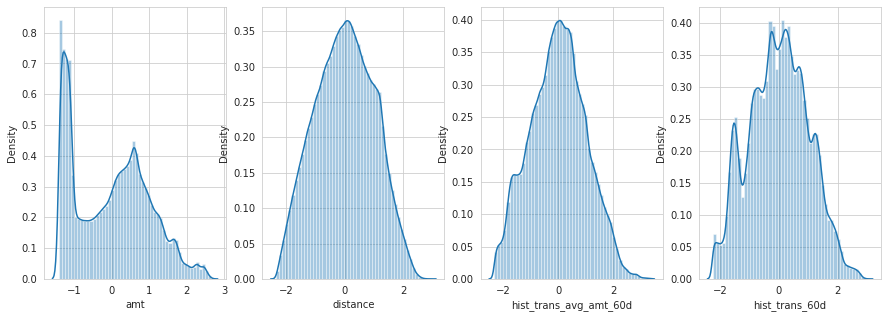

In [109]:
k=0
plt.figure(figsize=(15,5))

for col in numericalFeatures : 
    k=k+1
    plt.subplot(1,4,k)    
    sns.distplot(X_train[col])

**Model building on imbalanced dataset**

The data shows a high class imbalance. Over 99% cases are mapped to 0, but hardly 0.5% cases are mapped to 1. Any machine learning algorithm would work well when there is equal representation of each of the classes. However, in this case, no matter which model is built, the underlying algorithm will learn more about the non-fraudulent cases rather than the fraudulent ones. Therefore, the loss function optimisation will be heavily biased to the former type of data. This is known as the ‘minority class problem’.

**Metric selection for heavily imbalanced data**

The **ROC curve** is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. 

The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Precision, recall, confusion matrix and F1 score are calculated with default threshold of 0.5 and hence not the correct metrics for solving classification problems.

Because the ROC curve is measured at all thresholds, the best threshold would be one at which the **TPR is high and FPR is low**, i.e., **misclassifications are low.** Hence, ROC-AUC score is used as the evaluation metric for the model evaluation purpose. 

After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent.

For banks having a larger transaction value, we would want high recall in order to detect actual fraudulent transactions.

**Why KNN was not used for model building?**

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

**ROC_AUC_SCORE is different while calculating using predict() vs predict_proba()**

Predict returns either 0 or 1(True/False value) as output.
Predict_proba returns the probability of 1(values between one and zero)

AUC means "area under the curve" which is indeed different if the curve is a 0/1 step function or a curve made of continuous values.

**RandomizedSearchCV for hyperparameter tuning**

GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive. 


RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

**StratifiedKFold for cross validation**

KFold is a cross-validator that divides the dataset into k folds. The prediction function is learned using k - 1 folds, and the fold left out is used for validation. If we use the KFold for unbalanced dataset, we might endup in a training data that conatins no or very few minority classes.

StratifiedKFold ensures that each fold of dataset has the same  percentage of samples of each target class as the complete data set. Hence, StratifiedKFold is the improved version of KFold.

We should prefer StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

In [110]:
#import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [111]:
# Perfom cross validation on the X_train & y_train
cv_num = StratifiedKFold(n_splits = 5,
                         shuffle = True,
                         random_state = 0)

In [112]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

**Logistic regression on imbalanced dataset**

In [329]:
# Logistic Regression on imbalanced dataset


# Specify range of hyperparameters to tune
# The C parameter controls the penality strength
num_C = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


#perform cross validation
log_model_cv = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = num_C,
                        scoring= 'roc_auc', 
                        cv = cv_num,
                        verbose = 1,
                        return_train_score=True
                        )

#perform hyperparameter tuning
log_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [330]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train) 

# Print the evaluation result by choosing a evaluation metric
print('ROC AUC Score without hyperparameter tuning',roc_auc_score(y_train, log_model.predict(X_train)))

ROC AUC Score without hyperparameter tuning 0.6477940412799856


In [331]:
# Print the evaluation result by choosing a evaluation metric
print('ROC AUC Score after hyperparameter tuning', log_model_cv.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters ', log_model_cv.best_params_)

# Best hyperparameters  {'C': 1000.0}

ROC AUC Score after hyperparameter tuning 0.9189759503888073
Best hyperparameters  {'C': 1000.0}


In [332]:
# cross validation results
cv_results = pd.DataFrame(log_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.459966,0.371607,0.201500,0.004890,0.001,{'C': 0.001},0.865278,0.870273,0.861559,0.861681,0.867101,0.865178,0.003316,7,0.865373,0.864375,0.865975,0.865868,0.865195,0.865357,0.000572
1,14.581510,1.009948,0.205344,0.007214,0.01,{'C': 0.01},0.899223,0.900791,0.896724,0.897023,0.900580,0.898868,0.001718,6,0.899072,0.899372,0.899329,0.898961,0.899355,0.899218,0.000169
2,26.409690,2.170160,0.241328,0.087734,0.1,{'C': 0.1},0.916311,0.914398,0.912047,0.914256,0.916009,0.914604,0.001522,5,0.914687,0.915980,0.915309,0.914527,0.915103,0.915121,0.000513
3,28.241760,0.711893,0.227798,0.009851,1,{'C': 1.0},0.920458,0.917566,0.915611,0.918507,0.919900,0.918409,0.001730,4,0.918596,0.920023,0.919164,0.918363,0.918835,0.918996,0.000578
4,27.783501,0.457481,0.221515,0.010189,10,{'C': 10.0},0.920969,0.917979,0.916096,0.919066,0.920454,0.918913,0.001757,3,0.919091,0.920564,0.919689,0.918874,0.919348,0.919513,0.000592
5,27.690457,0.512436,0.218013,0.012737,100,{'C': 100.0},0.921029,0.918021,0.916162,0.919160,0.920507,0.918976,0.001756,2,0.919153,0.920615,0.919762,0.918961,0.919392,0.919577,0.000584
6,28.256304,1.127835,0.220132,0.012956,1000,{'C': 1000.0},0.921037,0.918033,0.916146,0.919151,0.920513,0.918976,0.001763,1,0.919158,0.920631,0.919746,0.918951,0.919399,0.919577,0.000590


**Logistic Regression with optimal C**

In [333]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=1000)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=1000)

**Prediction and model evalution on the train set**

In [334]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [335]:
# Train AUC
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)

Train auc = 0.6480597190903598


In [336]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[1288941     228]
 [   5282    2224]]


In [337]:
# Train data metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%") 
print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

Accuracy: 99.58%
F1 Score: 44.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.91      0.30      0.45      7506

    accuracy                           1.00   1296675
   macro avg       0.95      0.65      0.72   1296675
weighted avg       1.00      1.00      0.99   1296675



In [338]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

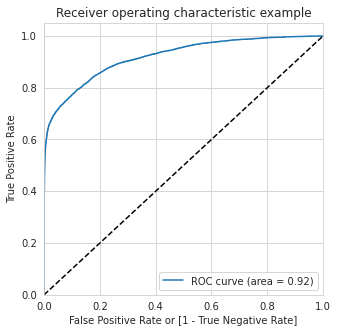

In [339]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Evaluating the model on the test set**

In [340]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

In [341]:
# Test AUC
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

Test auc = 0.6355062718824385


In [342]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[553399    175]
 [  1563    582]]


In [343]:
# Test data metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%") 
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

Accuracy: 99.69%
F1 Score: 40.11%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.27      0.40      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.64      0.70    555719
weighted avg       1.00      1.00      1.00    555719



In [344]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

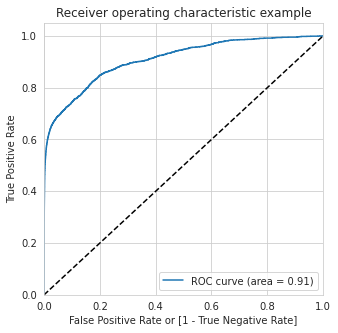

In [345]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
*   AUC-ROC: 0.91

Test set
*   AUC-ROC: 0.90

**Decision tree on imbalanced dataset**

In [ ]:
# Decision Tree on imbalanced dataset

# Specify range of hyperparameters to tune
# max_depth: The maximum depth of the tree. 
# min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# min_samples_split: The minimum number of samples required to split an internal node
# criterion: The function to measure the quality of a split. 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    "criterion": ["gini", "entropy"]
}

# Instantiate the grid search model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

# Call RandomizedSearchCV()
dtree_model_cv = RandomizedSearchCV(estimator = dtree_model,
                        param_distributions  = param_grid,
                        scoring= 'roc_auc', 
                        cv = cv_num,
                        verbose = 1,
                        return_train_score=True
                        )

# Fit the model
dtree_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(dtree_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.220283,0.087737,0.160423,0.002787,50,50,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.958687,0.953987,0.944754,0.958852,0.951441,0.953544,0.005225,9,0.957164,0.957087,0.955177,0.957269,0.957462,0.956832,0.000837
1,8.193251,0.135227,0.162029,0.003248,100,100,5,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.958680,0.954653,0.944788,0.958847,0.951721,0.953738,0.005206,8,0.957149,0.957069,0.955165,0.957325,0.957539,0.956850,0.000858
2,15.343521,0.144138,0.172745,0.004449,50,100,10,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.982964,0.986644,0.986828,0.991922,0.989384,0.987548,0.002995,5,0.994213,0.994209,0.992744,0.994911,0.994715,0.994158,0.000759
3,15.427072,0.140484,0.170593,0.002020,50,50,10,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.985479,0.987666,0.986801,0.990208,0.987621,0.987555,0.001545,4,0.994459,0.994528,0.992881,0.995170,0.994903,0.994388,0.000797
4,14.364562,0.938580,0.170203,0.005500,100,50,10,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.986084,0.989056,0.989203,0.989415,0.986567,0.988065,0.001433,3,0.997366,0.997435,0.997426,0.997440,0.997495,0.997433,0.000041
5,8.207557,0.090604,0.161821,0.001559,100,50,5,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.975122,0.978378,0.970671,0.976272,0.977424,0.975573,0.002684,7,0.977961,0.977164,0.978215,0.978179,0.978099,0.977923,0.000390
6,15.308103,0.082174,0.168383,0.002501,100,50,10,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.986119,0.987031,0.986801,0.990216,0.986975,0.987428,0.001431,6,0.994459,0.994528,0.992881,0.995170,0.994903,0.994388,0.000797
7,14.377855,0.786321,0.167033,0.008304,50,50,10,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.986081,0.989056,0.989203,0.989779,0.986567,0.988137,0.001508,2,0.997366,0.997435,0.997426,0.997440,0.997495,0.997433,0.000041
8,8.197493,0.101727,0.157614,0.003011,100,50,5,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.958687,0.953987,0.944754,0.958852,0.951441,0.953544,0.005225,9,0.957164,0.957087,0.955177,0.957269,0.957462,0.956832,0.000837
9,14.452905,0.777243,0.163915,0.001993,100,100,10,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.990059,0.990528,0.990776,0.991461,0.986562,0.989877,0.001718,1,0.997082,0.997132,0.997143,0.997173,0.997178,0.997141,0.000034


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score without hyperparameter tuning',roc_auc_score(y_train, dtree_model.predict(X_train)))

ROC AUC Score without hyperparameter tuning 1.0


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score after hyperparameter tuning', dtree_model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best Params ', dtree_model_cv.best_params_)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", dtree_model_cv.best_score_)
print(dtree_model_cv.best_estimator_)

ROC AUC Score after hyperparameter tuning 0.9898771758608833
Best Params  {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_depth': 10, 'criterion': 'entropy'}
Best roc auc score :  0.9898771758608833
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


**Decision Tree with optimal hyperparameters**

In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=0)

**Prediction on the train set**

In [ ]:
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Train AUC
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)

Train auc = 0.8276565572543186


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[1288616     553]
 [   2584    4922]]


In [ ]:
# Train data metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%")  
print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

Accuracy: 99.76%
F1 Score: 75.83%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.90      0.66      0.76      7506

    accuracy                           1.00   1296675
   macro avg       0.95      0.83      0.88   1296675
weighted avg       1.00      1.00      1.00   1296675



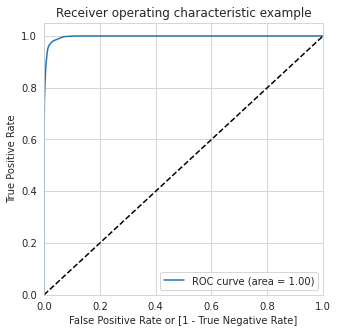

In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Evaluating the model on the test set**

In [ ]:
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Test AUC

print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

Test auc = 0.7875074947392288


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[553421    153]
 [   911   1234]]


In [ ]:
# Test data metrics

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%") 
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

Accuracy: 99.81%
F1 Score: 69.88%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.89      0.58      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.79      0.85    555719
weighted avg       1.00      1.00      1.00    555719



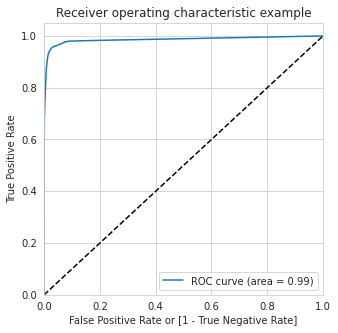

In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
*   AUC-ROC: 1.0

Test set
*   AUC-ROC: 0.99

**Random forest on imbalanced dataset**

In [ ]:
# Random Forest on imbalanced dataset

# specify range of hyperparameters to tune
# max_depth: The maximum depth of the tree. 
# min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# min_samples_split: The minimum number of samples required to split an internal node

# Create the parameter grid 
parameters = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}            

# specify model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# call RandomizedSearchCV()

rfc_model_cv = RandomizedSearchCV(estimator = rfc_model,
                        param_distributions  = parameters,
                        scoring= 'roc_auc', 
                        cv = cv_num,
                        verbose = 1,
                        return_train_score=True
                        )

# fit the model
rfc_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# specify model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# cv results
cv_results = pd.DataFrame(rfc_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.645411,1.555851,1.263920,0.004279,50,50,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.948216,0.946413,0.965575,0.967932,0.968363,0.959300,0.009848,5,0.949789,0.949071,0.967240,0.968311,0.967571,0.960396,0.008964
1,44.450257,0.707347,1.272693,0.011413,100,50,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.949458,0.946691,0.962670,0.942964,0.970962,0.954549,0.010557,6,0.951314,0.950865,0.963463,0.946342,0.970068,0.956411,0.008881
2,43.909156,0.244722,1.261876,0.014162,50,100,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.946602,0.943890,0.946384,0.944662,0.952706,0.946849,0.003102,8,0.947903,0.947998,0.948100,0.948254,0.948571,0.948165,0.000234
3,44.142764,0.704377,1.269114,0.015955,100,100,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.969778,0.946248,0.949724,0.945797,0.953604,0.953030,0.008832,7,0.967864,0.949998,0.950966,0.948847,0.950335,0.953602,0.007164
4,79.490049,1.201637,2.099845,0.034041,50,50,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.979482,0.977240,0.977176,0.979578,0.977787,0.978253,0.001065,1,0.981457,0.982623,0.982443,0.982821,0.982060,0.982281,0.000482
5,78.568121,1.119631,2.041565,0.024495,100,50,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.980387,0.977770,0.977562,0.975301,0.978194,0.977843,0.001621,3,0.981774,0.983287,0.982666,0.979523,0.981632,0.981777,0.001279
6,78.637038,0.693628,2.081244,0.040972,50,100,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.977569,0.976926,0.975975,0.976326,0.977067,0.976773,0.000562,4,0.979544,0.981473,0.980725,0.979196,0.980171,0.980222,0.000816
7,81.078940,2.692912,2.097057,0.052742,100,100,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.979525,0.977535,0.976015,0.978359,0.979055,0.978098,0.001239,2,0.980540,0.982333,0.980104,0.981175,0.981979,0.981226,0.000839


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score without hyperparameter tuning',roc_auc_score(y_train, rfc_model.predict(X_train)))

ROC AUC Score without hyperparameter tuning 0.9997335464961364


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score after hyperparameter tunning', rfc_model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best Params ', rfc_model_cv.best_params_)


# Printing the optimal hyperparameters
print(rfc_model_cv.best_estimator_)

ROC AUC Score after hyperparameter tunning 0.9782525648550131
Best Params  {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 10}
RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


**Random forest model with optimal hyperparameter**

In [ ]:
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=10, 
                             min_samples_leaf=50, 
                             min_samples_split=50)

# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

**Model evaluation on train set**

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Train AUC
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)

Train auc = 0.6540623882795594


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[1289169       0]
 [      0    7506]]


In [ ]:
# Train data metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%") 
print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

Accuracy: 99.58%
F1 Score: 43.56%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.99      0.28      0.44      7506

    accuracy                           1.00   1296675
   macro avg       0.99      0.64      0.72   1296675
weighted avg       1.00      1.00      0.99   1296675



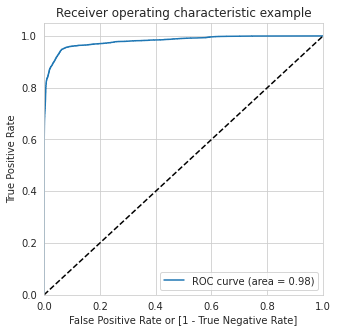

In [ ]:
# Predicted probability
y_train_pred_proba_imb_rfc = rfc_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_rfc)

**Evaluating the model on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Test AUC
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

Test auc = 0.6337661145999327


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[553549     25]
 [  1657    488]]


In [ ]:
# Test data metrics

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%") 
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

Accuracy: 99.7%
F1 Score: 36.72%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.23      0.37      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.61      0.68    555719
weighted avg       1.00      1.00      1.00    555719



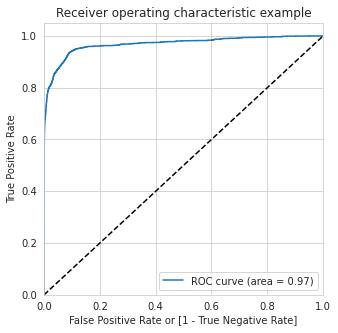

In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


**Model summary**

Train set
*   AUC-ROC: 0.98

Test set
*   AUC-ROC: 0.97

**XGBoost on imbalanced dataset**

In [ ]:
# XGBoost on imbalanced dataset

# learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# subsample: The fraction of samples to be used for fitting the individual base learners. 


# specify range of hyperparameters to tune
num_C =  {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          } 


# specify model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# call RandomizedSearchCV()
xgb_model_cv = RandomizedSearchCV(estimator = xgb_model,
                        param_distributions  = num_C,
                        scoring= 'roc_auc', 
                        cv = cv_num,
                        verbose = 1,
                        return_train_score=True
                        )

# fit the model
xgb_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_jobs,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,150.190479,1.219379,0.751017,0.009000,0.3,-1,0.2,"{'subsample': 0.3, 'n_jobs': -1, 'learning_rat...",0.994796,0.994980,0.994021,0.995311,0.994452,0.994712,0.000443,2,0.995664,0.995623,0.995525,0.995575,0.995278,0.995533,0.000136
1,169.385206,1.269605,0.738956,0.008807,0.6,-1,0.2,"{'subsample': 0.6, 'n_jobs': -1, 'learning_rat...",0.995228,0.994846,0.993100,0.995648,0.994541,0.994672,0.000870,3,0.995422,0.995491,0.994766,0.995713,0.995577,0.995394,0.000328
2,137.316284,0.505783,0.728470,0.010699,0.9,-1,0.2,"{'subsample': 0.9, 'n_jobs': -1, 'learning_rat...",0.995379,0.994931,0.993301,0.995087,0.994593,0.994658,0.000724,4,0.995760,0.995231,0.995020,0.994940,0.995389,0.995268,0.000292
3,147.931998,0.920697,0.820677,0.013134,0.3,-1,0.6,"{'subsample': 0.3, 'n_jobs': -1, 'learning_rat...",0.996252,0.993979,0.995277,0.995409,0.996091,0.995402,0.000805,1,0.997228,0.996235,0.997331,0.996812,0.996796,0.996880,0.000388
4,168.935640,0.908203,0.792120,0.021412,0.6,-1,0.6,"{'subsample': 0.6, 'n_jobs': -1, 'learning_rat...",0.996298,0.982907,0.996532,0.910772,0.980178,0.973338,0.031994,5,0.997885,0.979540,0.998346,0.921376,0.979603,0.975350,0.028233
5,137.878860,0.503428,0.739417,0.043722,0.9,-1,0.6,"{'subsample': 0.9, 'n_jobs': -1, 'learning_rat...",0.874676,0.900008,0.902229,0.903885,0.932632,0.902686,0.018385,6,0.892051,0.898668,0.900471,0.912945,0.922149,0.905257,0.010818


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score without hyperparameter tunning',roc_auc_score(y_train, xgb_model.predict(X_train)))

ROC AUC Score without hyperparameter tunning 0.8199732323244245


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('ROC AUC Score after hyperparameter tuning', xgb_model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best Params ', xgb_model_cv.best_params_)

# Printing the optimal hyperparameters
print(xgb_model_cv.best_estimator_)

ROC AUC Score after hyperparameter tuning 0.9954016628025574
Best Params  {'subsample': 0.3, 'learning_rate': 0.6}
XGBClassifier(learning_rate=0.6, subsample=0.3)


**XGBoost model with optimal hyperparameter**

In [ ]:
# Printing best params
params = {'learning_rate': 0.6,
          'subsample':0.3,
          }

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.6, 'subsample': 0.3})

**Model evaluation on train set**

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

F1 Score: 75.38%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.92      0.64      0.75      7506

    accuracy                           1.00   1296675
   macro avg       0.96      0.82      0.88   1296675
weighted avg       1.00      1.00      1.00   1296675



In [ ]:
# Train AUC
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)

Train auc = 0.8199732323244245


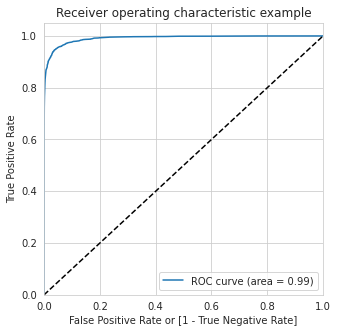

In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

**Evaluating the model on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))


F1 Score: 71.76%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.87      0.61      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.81      0.86    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
# Test data metrics
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

Test auc = 0.8054155677154589


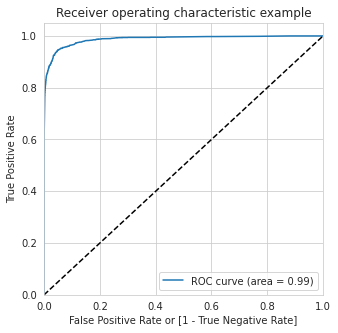

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
*   AUC-ROC: 0.99

Test set
*   AUC-ROC: 0.99

**Choosing best model on the imbalanced data**

Amongst all the machine learning models ie., Logistic, XGBoost, Decision Tree, and Random Forest, almost all of them have performed well. Decison tree and XGBoost performed best in terms of ROC-AUC score.

Decison tree has ROC score of 1.0 on the train data and 0.99 on the test data. XGBoost has ROC score of 0.99 on both test and train data.

XGBoost requires more resource utilization than decision tree. Hence building XGBoost model is more costlier than the decision tree. 

The 0.01 increase of score may convert into huge amount of saving for the bank. Hence, Decison tree is the best model on the imbalanced data

**Handling data imbalance**

As we see that the data is heavily imbalanced, There are several approaches to handle data imbalance.

**Undersampling** : For balancing the class distribution, fewer data points from the non-fraudulent transactions is selected. In practice, this method is not effective because over 99% of the original data is lost.

**Oversampling** :  Assign weights to randomly chosen data points from the minority class so that the algorithm can focus on this class while optimising the loss function. This method does not add any new information and may even exaggerate the existing information quite a bit.

**SMOTE** : Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data. It generates new data points, which lie vectorially between two data points that belong to the minority class.

**ADASYN**: This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

Due to the disadvantages of undersamping and oversampling techniques, SMOTE and ADASYN techniques are used to handle the data imbalance.

**Why Random forest was not used for model building?**

Large number of trees in the random forest can make the algorithm too slow and ineffective for real-time predictions. A more accurate prediction requires more trees, which results in a slower model. In most real-world applications, the random forest algorithm is fast enough but there can certainly be situations where run-time performance is important and other approaches would be preferred.

**SMOTE (Synthetic Minority Oversampling Technique)**

In [176]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [177]:
# Instantiate SMOTE
sm = SMOTE(random_state=0)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (1296675, 54)
After SMOTE oversampling X_train shape= (2578338, 54)


Synthetic data points are generated which lie vectorially between two data points that belong to the minority class.

In [348]:
# Perfom cross validation on the X_train & y_train
folds = StratifiedKFold(n_splits = 5,
                         shuffle = True,
                         random_state = 0)

**Logistic Regression on balanced data with SMOTE**

In [ ]:
# Specify range of hyperparameters to tune
# The C parameter controls the penality strength
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#perform cross validation
model_cv = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.893573,1.817341,0.328986,0.002688,0.01,{'C': 0.01},0.979827,0.979809,0.979716,0.979577,0.979965,0.979779,0.000129,1,0.979778,0.979780,0.979796,0.979833,0.979731,0.979784,0.000033
1,48.529841,0.871280,0.332205,0.004566,0.1,{'C': 0.1},0.979809,0.979791,0.979698,0.979545,0.979955,0.979760,0.000135,2,0.979759,0.979762,0.979778,0.979815,0.979711,0.979765,0.000033
2,47.893653,0.778379,0.334818,0.007430,1,{'C': 1},0.979775,0.979759,0.979665,0.979511,0.979923,0.979727,0.000136,3,0.979726,0.979729,0.979746,0.979782,0.979679,0.979732,0.000033
3,47.442172,1.004231,0.327301,0.002631,10,{'C': 10},0.979772,0.979754,0.979661,0.979508,0.979920,0.979723,0.000136,4,0.979722,0.979725,0.979741,0.979779,0.979675,0.979728,0.000034
4,47.749182,1.330808,0.331864,0.005801,100,{'C': 100},0.979771,0.979754,0.979661,0.979507,0.979919,0.979723,0.000136,5,0.979722,0.979724,0.979741,0.979778,0.979674,0.979728,0.000034
5,48.566959,0.710756,0.327801,0.005175,1000,{'C': 1000},0.979771,0.979754,0.979661,0.979507,0.979919,0.979722,0.000136,6,0.979722,0.979724,0.979741,0.979778,0.979674,0.979728,0.000034


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9797787560906921
Best hyperparameters:  {'C': 0.01}


**Logistic Regression with optimal C**

In [349]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=0.01)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.01)

**Evaluating the model on train data**

In [350]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)


print(f"F1 Score: {round(metrics.f1_score(y_train_smote, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_smote, y_train_pred))

F1 Score: 93.44%
              precision    recall  f1-score   support

           0       0.95      0.92      0.93   1289169
           1       0.92      0.95      0.93   1289169

    accuracy                           0.93   2578338
   macro avg       0.93      0.93      0.93   2578338
weighted avg       0.93      0.93      0.93   2578338



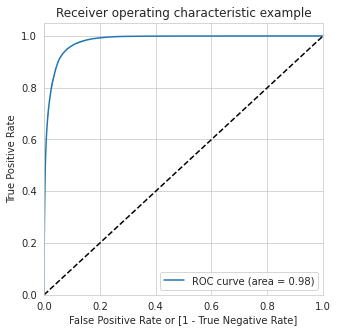

In [351]:
# Predicted probability
y_train_pred_proba = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [352]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba )

Train auc = 0.9814298485105655


**Evaluating on test data**

In [353]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)

print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 6.0%
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.03      0.69      0.06      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.80      0.51    555719
weighted avg       0.99      0.92      0.95    555719



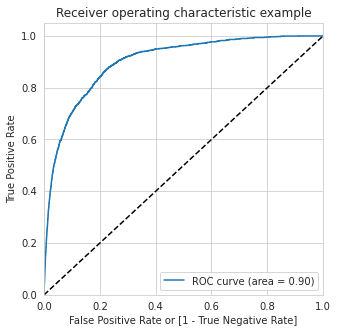

In [ ]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

**Model summary**

Train set
*   AUC-ROC: 0.98

Test set
*   AUC-ROC: 0.9

**Decision Tree on balanced data with SMOTE**

In [ ]:
# Specify range of hyperparameters to tune
# max_depth: The maximum depth of the tree. 
# min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# min_samples_split: The minimum number of samples required to split an internal node

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

# Call RandomizedSearchCV()
grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the model
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

print(grid_search.best_params_)

Best roc auc score :  0.9805909088049521
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)
{'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 10}


**Decision tree with optimal hyperparameters**

In [354]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)

**Evaluating the model on train data**

In [355]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)

print(f"F1 Score: {round(metrics.f1_score(y_train_smote, y_train_pred_smote)*100,2)}%") 
print(metrics.classification_report(y_train_smote, y_train_pred_smote))

F1 Score: 95.89%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96   1289169
           1       0.97      0.95      0.96   1289169

    accuracy                           0.96   2578338
   macro avg       0.96      0.96      0.96   2578338
weighted avg       0.96      0.96      0.96   2578338



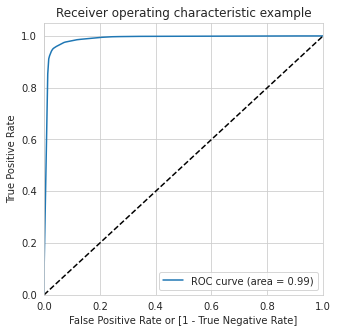

In [356]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [357]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba )

Train auc = 0.9877046400136966


**Evaluating the model on the test set**

In [358]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 6.0%
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.03      0.69      0.06      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.80      0.51    555719
weighted avg       0.99      0.92      0.95    555719



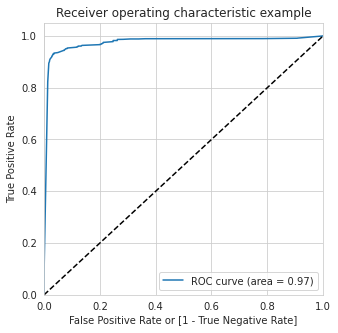

In [359]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

**Model summary**

Train set
*   AUC-ROC: 0.99

Test set
*   AUC-ROC: 0.98

**XGBoost on balanced data with SMOTE**

In [ ]:
# specify range of hyperparameters
# learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# subsample: The fraction of samples to be used for fitting the individual base learners. 

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#xgb_model = XGBClassifier()

# call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

print(model_cv.best_params_)

**XGBoost with optimal hyperparameters**

In [178]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which is required to calculate auc
params = {'learning_rate': 0.6,
          'subsample':0.6,
         'objective':'binary:logistic'}

# XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)
# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'objective': 'binary:logistic',
                      'subsample': 0.6})

**Evaluating the model on the train data**

In [361]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
print(f"F1 Score: {round(metrics.f1_score(y_train_smote, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_smote, y_train_pred))

F1 Score: 95.36%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95   1289169
           1       0.97      0.94      0.95   1289169

    accuracy                           0.95   2578338
   macro avg       0.95      0.95      0.95   2578338
weighted avg       0.95      0.95      0.95   2578338



In [362]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[1248568   40601]
 [  77329 1211840]]


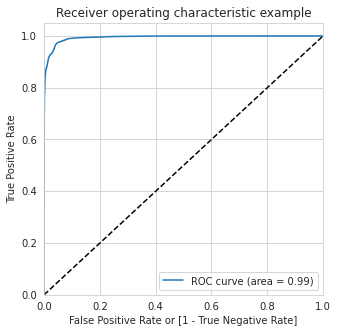

In [363]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [364]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba )

Train auc = 0.9939161645503468


**Evaluating the model on test data**

In [365]:
y_test_pred = xgb_smote_model.predict(X_test)
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 18.15%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.10      0.93      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.95      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [366]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[535815  17759]
 [   159   1986]]


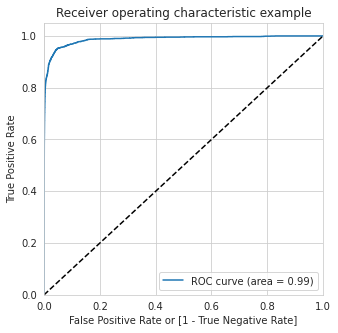

In [367]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Evaluating the model on the unsampled train data**

In [368]:
# Predicting on the train set
y_train_pred = xgb_smote_model.predict(X_train)

# Printing the scores
print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

F1 Score: 25.46%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1289169
           1       0.15      0.93      0.25      7506

    accuracy                           0.97   1296675
   macro avg       0.57      0.95      0.62   1296675
weighted avg       0.99      0.97      0.98   1296675



In [369]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[1248568   40601]
 [    488    7018]]


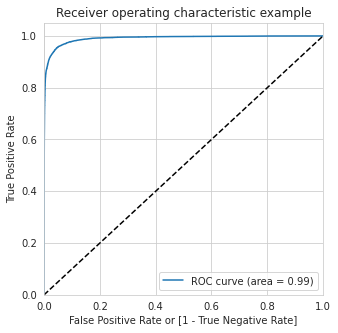

In [370]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [371]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba )

Train auc = 0.9906505751567668


**Model summary**

Train set
*   AUC-ROC: 0.99

Test set
*   AUC-ROC: 0.99

**ADASYN (Adaptive Synthetic Sampling)**

In [113]:
# Importing over_sampling
from imblearn import over_sampling

# Instantiating ADASYN
ada = over_sampling.ADASYN(random_state=0)

# Fitting ADASYN to the train set
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [114]:
print('Before ADASYN oversampling X_train shape=',X_train.shape)
print('After ADASYN oversampling X_train shape=',X_train_adasyn.shape)

Before ADASYN oversampling X_train shape= (1296675, 54)
After ADASYN oversampling X_train shape= (2578411, 54)


Synthetic data is generated on the region of low density of imbalanced data points.

**Logistic Regression on balanced data with ADASYN**

In [115]:
# Perfom cross validation on the X_train & y_train
folds = StratifiedKFold(n_splits = 5,
                         shuffle = True,
                         random_state = 0)

In [116]:
# Specify range of hyperparameters to tune
# The C parameter controls the penality strength
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [117]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9770271910713797
Best hyperparameters:  {'C': 0.1}


In [118]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,47.989524,2.487051,0.383826,0.027404,0.01,{'C': 0.01},0.976989,0.977066,0.976955,0.976590,0.976952,0.976911,0.000165,6,0.976893,0.976888,0.976900,0.976996,0.976907,0.976917,0.00004
1,54.809467,0.535244,0.398691,0.025842,0.1,{'C': 0.1},0.977116,0.977171,0.977076,0.976693,0.977080,0.977027,0.000171,1,0.977010,0.977004,0.977017,0.977113,0.977024,0.977034,0.00004
2,55.270624,1.161406,0.467942,0.119974,1,{'C': 1},0.977114,0.977166,0.977072,0.976687,0.977078,0.977023,0.000171,2,0.977006,0.977000,0.977014,0.977110,0.977020,0.977030,0.00004
3,54.439468,0.860373,0.399802,0.008977,10,{'C': 10},0.977113,0.977165,0.977072,0.976686,0.977077,0.977023,0.000172,3,0.977006,0.976999,0.977013,0.977109,0.977020,0.977029,0.00004
4,55.041739,1.555414,0.409499,0.025283,100,{'C': 100},0.977113,0.977165,0.977072,0.976686,0.977077,0.977022,0.000172,4,0.977006,0.976999,0.977013,0.977109,0.977020,0.977029,0.00004
5,54.633885,1.731293,0.398800,0.017560,1000,{'C': 1000},0.977113,0.977165,0.977072,0.976686,0.977077,0.977022,0.000172,5,0.977005,0.976999,0.977013,0.977109,0.977020,0.977029,0.00004


**Logistic Regression with optimal C**

In [119]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

**Evaluating the model with train data**

In [120]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)

print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))


F1 Score: 92.99%
              precision    recall  f1-score   support

           0       0.94      0.91      0.93   1289169
           1       0.92      0.94      0.93   1289242

    accuracy                           0.93   2578411
   macro avg       0.93      0.93      0.93   2578411
weighted avg       0.93      0.93      0.93   2578411



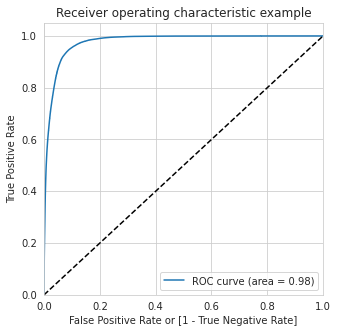

In [121]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [122]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )

Train auc = 0.9770285491087793


**Evaluating on test data**

In [123]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)

print(f"F1 Score: {round(metrics.f1_score(y_test, y_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_pred))

F1 Score: 5.56%
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.68      0.06      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.91      0.95    555719



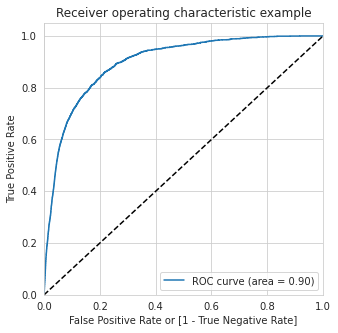

In [124]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
*   AUC-ROC: 0.98


Test set
*   AUC-ROC: 0.89

**Decision Tree on balanced data with ADASYN**

In [ ]:
# Specify range of hyperparameters to tune
# max_depth: The maximum depth of the tree. 
# min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# min_samples_split: The minimum number of samples required to split an internal node

params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_cv = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = params, 
                           scoring= 'roc_auc',
                           cv = folds, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the model
model_cv.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9728113175077784
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


**Model with optimal hyperparameters**

In [125]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=0)

**Evaluating the model on train data**

In [126]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)

print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))

F1 Score: 94.52%
              precision    recall  f1-score   support

           0       0.95      0.94      0.94   1289169
           1       0.94      0.95      0.95   1289242

    accuracy                           0.94   2578411
   macro avg       0.94      0.94      0.94   2578411
weighted avg       0.94      0.94      0.94   2578411



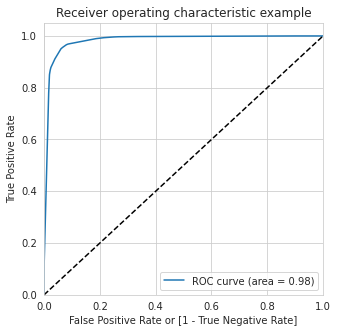

In [127]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [128]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )

Train auc = 0.9823061317690004


**Evaluating the model on the test set**

In [ ]:
# Evaluating model on the test data
y_test_pred = dt_adasyn_model.predict(X_test)


print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 10.6%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.06      0.94      0.11      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.94      0.54    555719
weighted avg       1.00      0.94      0.97    555719



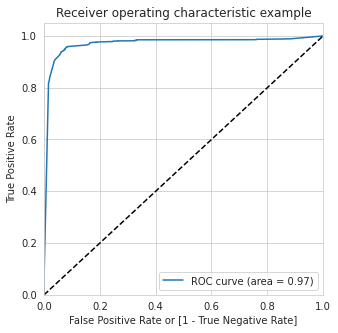

In [ ]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
*   AUC-ROC: 0.98

Test set
*   AUC-ROC: 0.97


**XGBoost on balanced data with ADASYN**

In [ ]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,576.627108,0.930667,2.658079,0.255260,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.995219,0.995477,0.994976,0.995460,0.995476,0.995321,0.000199,4,0.995285,0.995464,0.994997,0.995569,0.995386,0.995340,0.000195
1,657.507591,2.874194,2.474199,0.359715,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.995190,0.995335,0.995210,0.995275,0.995360,0.995274,0.000067,5,0.995231,0.995323,0.995239,0.995410,0.995281,0.995297,0.000065
2,569.614348,2.866352,2.064048,0.014726,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.995312,0.995439,0.995358,0.994934,0.995179,0.995244,0.000177,6,0.995365,0.995433,0.995390,0.995085,0.995106,0.995276,0.000149
3,573.146558,1.804750,2.198054,0.079641,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.998915,0.998806,0.998476,0.998844,0.998795,0.998767,0.000152,3,0.998920,0.998797,0.998546,0.998900,0.998729,0.998778,0.000135
4,656.641326,2.461728,2.305747,0.355840,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.998846,0.998816,0.998722,0.998669,0.998853,0.998781,0.000073,2,0.998853,0.998814,0.998768,0.998747,0.998799,0.998796,0.000037
5,569.517206,4.039288,2.385753,0.300212,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.998833,0.998829,0.998797,0.998742,0.998885,0.998817,0.000047,1,0.998837,0.998838,0.998855,0.998814,0.998841,0.998837,0.000013


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9988170631834906
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


**Model with optimal hyperparameter**

In [131]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

**Evaluating the model on the train data**

In [144]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)

# Printing the scores
print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))

F1 Score: 95.76%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96   1289169
           1       0.96      0.96      0.96   1289242

    accuracy                           0.96   2578411
   macro avg       0.96      0.96      0.96   2578411
weighted avg       0.96      0.96      0.96   2578411



In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[1236362   52807]
 [  56305 1232937]]


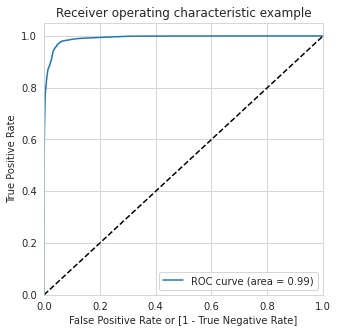

In [146]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [147]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )


Train auc = 0.9919037930595132


**Evaluating the model on test data**

In [136]:
y_test_pred = xgb_adasyn_model.predict(X_test)

print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 14.85%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.94      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[530446  23128]
 [   118   2027]]


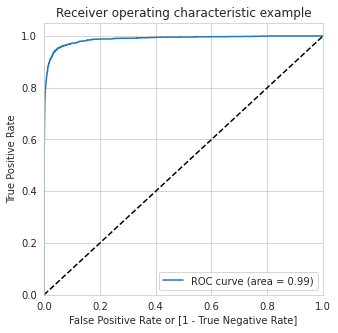

In [138]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Evaluating the model on the unsampled train data**

In [139]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train)

# Printing the scores
print(f"F1 Score: {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train, y_train_pred))

F1 Score: 21.18%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1289169
           1       0.12      0.95      0.21      7506

    accuracy                           0.96   1296675
   macro avg       0.56      0.96      0.60   1296675
weighted avg       0.99      0.96      0.97   1296675



In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[1236362   52807]
 [    362    7144]]


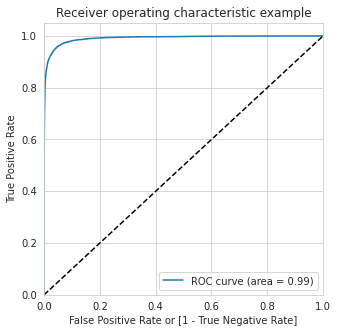

In [141]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [142]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9911681813365569
Threshold= 0.4608929


**Model summary**

Train set
*   AUC-ROC: 0.99

Test set
*   AUC-ROC: 0.99

**Select the sampling method which shows the best result on a model**

Balancing techniques were used to solve the minority class imbalance i.e, SMOTE, and ADASYN techniques were used to balance the dataset. Logistic regression, decision tree and XGBoost algorithms were used to build models on each sampling method. While selecting the best model, few factors must be considered such as infrastructure, resources or computational power to run the model. 




**COST OF DEPLOYMENT** : For the models such as Random forest and XGBoost, heavy computational resources are required to build the infrastructure. The cost of deploying the model increases. On the other hand, simpler model such as Logistic regression requires less computational resources, so the cost of building and deploying the model is less.

**MONETARY LOSS** : We must also consider the monetary loss the bank incurs due to small change in the AUC-ROC score. If the loss incurred is huge, we must consider building the complex model even though the cost of building the model is high.


After conducting the experiment, we observe that XGBoost model is performing well on the dataset which is balanced with ADASYN and SMOTE techniques. We observe an ROC score of 99% on train data and test data and F1 score of around 95% on train data.

XGBoost model with ADASYN is the best model based on AUC_ROC and recall scores

**Best threshold from the roc curve**

Train auc = 0.9911681813365569
Threshold= 0.4608929

**0.46** is the threshold for which TPR is the highest and FPR is the lowest and we get 99.11% ROC score on the unsampled train data.




**Business Impact**

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

**To save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.**


**Cost benefit analysis**

To perform this analysis, the costs incurred before and after the model is deployed are compared. Earlier, the bank paid the entire transaction amount to the customer for every fraudulent transaction which accounted for a heavy loss to the bank.

The cost incurred after the model is deployed is due to the left out fraudulent transactions that the model fails to detect. Hence, the total savings for the bank would be the difference of costs incurred after and before the model deployment.

**Analysis on the entire dataset(merging train and test sets)**

In [148]:
y_train_pred = xgb_adasyn_model.predict(X_train)
y_test_pred = xgb_adasyn_model.predict(X_test)

# xgb_smote_model
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1289169
           1       0.12      0.95      0.21      7506

    accuracy                           0.96   1296675
   macro avg       0.56      0.96      0.60   1296675
weighted avg       0.99      0.96      0.97   1296675

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.94      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [149]:
# Subset of df_train

df_train_subset = df_train[['trans_date_trans_time','trans_year_month','cc_num','amt','trans_num','is_fraud']]
df_train_subset.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,2019-01,2703186189652095,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,2019-01,630423337322,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,2019-01,38859492057661,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,2019-01,3534093764340240,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,2019-01,375534208663984,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [150]:
# Creating dataframe of y_train_pred

df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [151]:
# Merging the two dataframes

df_train_final = pd.concat([df_train_subset, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,2019-01,2703186189652095,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,2019-01,630423337322,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,2019-01,38859492057661,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,2019-01,3534093764340240,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,2019-01,375534208663984,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [152]:
# Renaming column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,2019-01,2703186189652095,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,2019-01,630423337322,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,2019-01,38859492057661,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,2019-01,3534093764340240,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,2019-01,375534208663984,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [153]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [154]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1236724
1      59951
Name: is_fraud_pred, dtype: int64

In [155]:
# Subset of df_test

df_test_subset = df_test[['trans_date_trans_time','trans_year_month','cc_num','amt','trans_num','is_fraud']]
df_test_subset.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2020-06,2291163933867244,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,2020-06,3573030041201292,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,2020-06,3598215285024754,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,2020-06,3591919803438423,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,2020-06,3526826139003047,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [156]:
# Creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [157]:
# Merging the two dataframes

df_test_final = pd.concat([df_test_subset, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2020-06,2291163933867244,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,2020-06,3573030041201292,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,2020-06,3598215285024754,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,2020-06,3591919803438423,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,2020-06,3526826139003047,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [158]:
# Renaming column

df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2020-06,2291163933867244,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,2020-06,3573030041201292,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,2020-06,3598215285024754,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,2020-06,3591919803438423,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,2020-06,3526826139003047,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [159]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [160]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    530564
1     25155
Name: is_fraud_pred, dtype: int64

In [161]:
# Merging train and test dataset for cost benefit analysis

df_merged_data = pd.concat([df_train_final, df_test_final],axis=0)
df_merged_data.head()

,trans_date_trans_time,trans_year_month,cc_num,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,2019-01,2703186189652095,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,2019-01,630423337322,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,2019-01,38859492057661,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,2019-01,3534093764340240,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,2019-01,375534208663984,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [162]:
# Number of transactions and number of customers seen per month 

transaction_df= df_merged_data.groupby(df_merged_data['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
transaction_df.columns = ['year_month','Number of Transactions','Number of customers']
transaction_df

,year_month,Number of Transactions,Number of customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


In [163]:
# Number of fraud transctions and fraud customers seen per month

fraud_transactions_df = df_merged_data[df_merged_data['is_fraud']==1]

fraud_transactions_df = fraud_transactions_df.groupby(fraud_transactions_df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
fraud_transactions_df.columns = ['year_month','Number of fraud Transactions','Number of fraud customers']
fraud_transactions_df

,year_month,Number of fraud Transactions,Number of fraud customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


**Part I: Analyse the dataset and find the following figures**
- Average number of transactions per month 
- Average number of fraudulent transactions per month
- Average amount per fraudulent transaction 


In [179]:
#Average Number of transactions by year_month

a = round(transaction_df['Number of Transactions'].mean(),2)
print(round(a,2))

77183.08


In [180]:
#Average number of fraudulent transactions per year_month(b)

b = round(fraud_transactions_df['Number of fraud Transactions'].mean(),2)
print(round(b,2))

402.12


In [181]:
# Average amount per fraud transaction(c)

c = round(df_merged_data[df_merged_data['is_fraud']==1].amt.mean(),2)
print(round(c,2))

530.66


**Part II: Compare the cost incurred per month by the bank before and after the model deployment**

Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

Cost incurred per month after the model is built and deployed: 
Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN

Final savings = Cost incurred before - Cost incurred after.

In [182]:
# Cost incurred per month before the model was deployed (b*c)
#fraud_transactions_df['Number of fraud Transactions'].mean()*df_merged_data[df_merged_data['is_fraud']==1].amt.mean()

print(round(b*c,2))

213389.0


In [168]:
# Average number of transactions per month detected as fraudulent by the model (TF)

TF = round(df_merged_data[df_merged_data['is_fraud_pred']==1].trans_num.count()/24,2)
print(TF)


3546.08


In [169]:
# Cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

# Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
# df_merged_data[df_merged_data['is_fraud_pred']==1].trans_num.count()/24*1.5
customer_support_cost = round(TF*1.5,2)
print(customer_support_cost)

5319.12


In [170]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

undetected_frauds = df_merged_data.loc[(df_merged_data.is_fraud_pred==0) & (df_merged_data.is_fraud==1)]
FN = round(undetected_frauds.trans_num.count()/24,2)

print(FN)

20.0


In [184]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

# undetected_frauds.trans_num.count()/24 * df_merged_data[df_merged_data['is_fraud']==1].amt.mean()

undetected_fraud_cost = round(FN*c,2)
print(undetected_fraud_cost)

10613.2


In [185]:
# Cost incurred per month after the model is built and deployed 

#model_cost = round(df_merged_data[df_merged_data['is_fraud_pred']==1].trans_num.count()/24*1.5 + undetected_frauds.trans_num.count()/24 * df_merged_data[df_merged_data['is_fraud']==1].amt.mean() ,2)
model_cost = round(customer_support_cost + undetected_fraud_cost ,2)
print(model_cost)

15932.32


In [186]:
# Final savings = Cost incurred before - Cost incurred after

#fraud_transactions_df['Number of fraud Transactions'].mean()*df_merged_data[df_merged_data['is_fraud']==1].amt.mean() - df_merged_data[df_merged_data['is_fraud_pred']==1].trans_num.count()/24*1.5 + undetected_frauds.trans_num.count()/24 * df_merged_data[df_merged_data['is_fraud']==1].amt.mean()
total_savings = round((b*c),2) - model_cost
print(round(total_savings,2))

197456.68


In [188]:
print("The total savings for the bank would be the difference of costs incurred after and before the model deployment : $",total_savings )

The total savings for the bank would be the difference of costs incurred after and before the model deployment : $ 197456.68
